In [1]:
from neural_network import NeuralNetwork
from data_gen import RodDataGen
import matplotlib.pyplot as plt
import numpy as np
import itertools
import re

In [2]:
data = RodDataGen(Nx = 10, Nt = 10, L = 1, T = 1)

Layers to test: [[2, 10, 25, 1], [2, 10, 10, 1], [2, 10, 150, 1], [2, 25, 10, 1], [2, 25, 10, 1], [2, 25, 150, 1], [2, 10, 10, 1], [2, 10, 25, 1], [2, 10, 150, 1], [2, 150, 10, 1], [2, 150, 25, 1], [2, 150, 10, 1]]
Activation Functions to test: [['sigmoid', 'sigmoid', 'sigmoid'], ['sigmoid', 'sigmoid', 'tanh'], ['sigmoid', 'tanh', 'sigmoid'], ['sigmoid', 'tanh', 'tanh'], ['sigmoid', 'ReLU', 'sigmoid'], ['sigmoid', 'ReLU', 'tanh'], ['tanh', 'sigmoid', 'sigmoid'], ['tanh', 'sigmoid', 'tanh'], ['tanh', 'tanh', 'sigmoid'], ['tanh', 'tanh', 'tanh'], ['tanh', 'ReLU', 'sigmoid'], ['tanh', 'ReLU', 'tanh'], ['ReLU', 'sigmoid', 'sigmoid'], ['ReLU', 'sigmoid', 'tanh'], ['ReLU', 'tanh', 'sigmoid'], ['ReLU', 'tanh', 'tanh'], ['ReLU', 'ReLU', 'sigmoid'], ['ReLU', 'ReLU', 'tanh']]
Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:03<00:00,  1.59s/it]


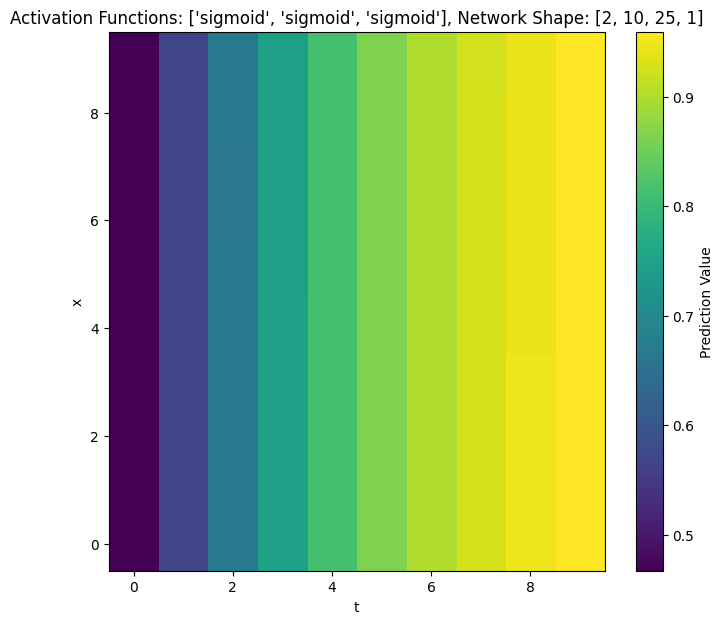

Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


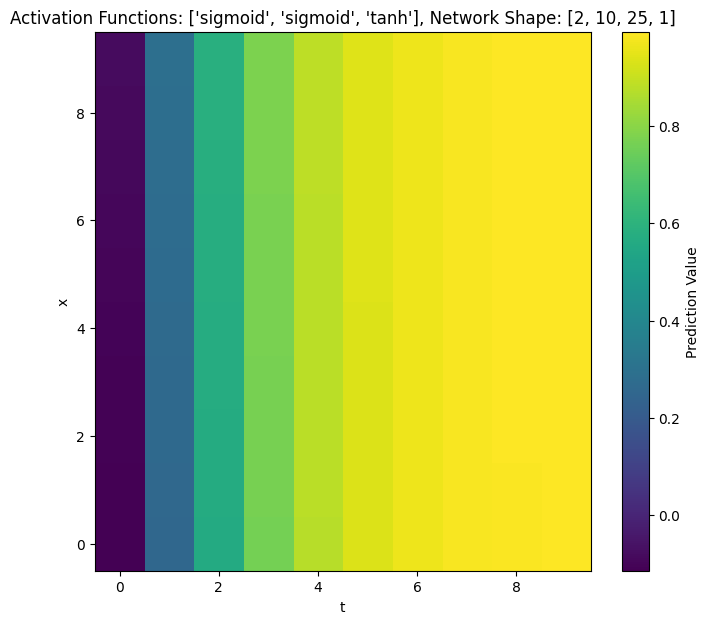

Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.34s/it]


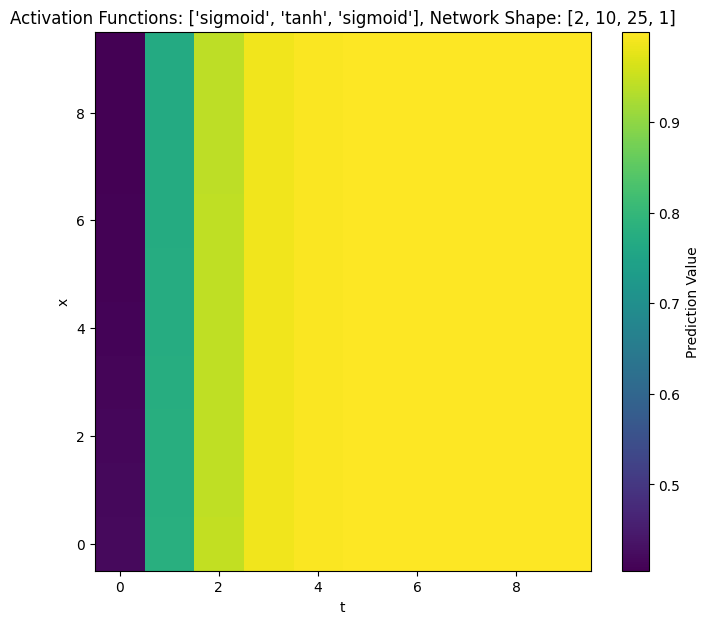

Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


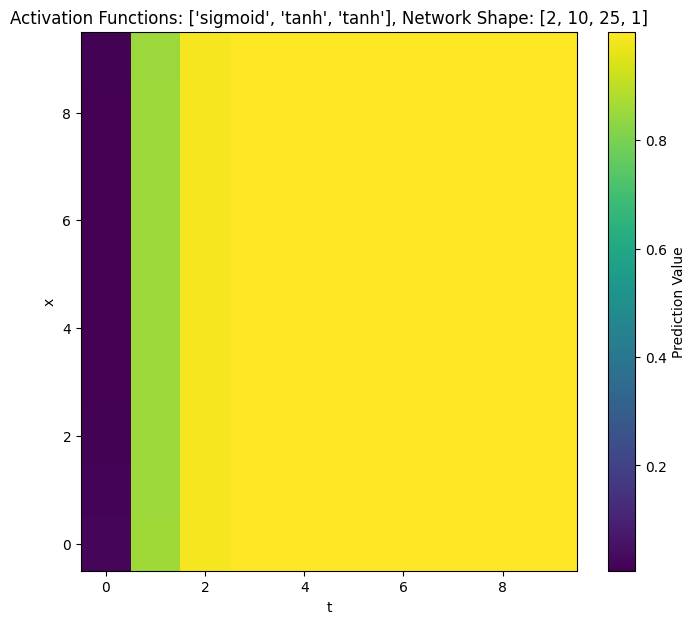

Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:51<00:00,  1.28s/it]


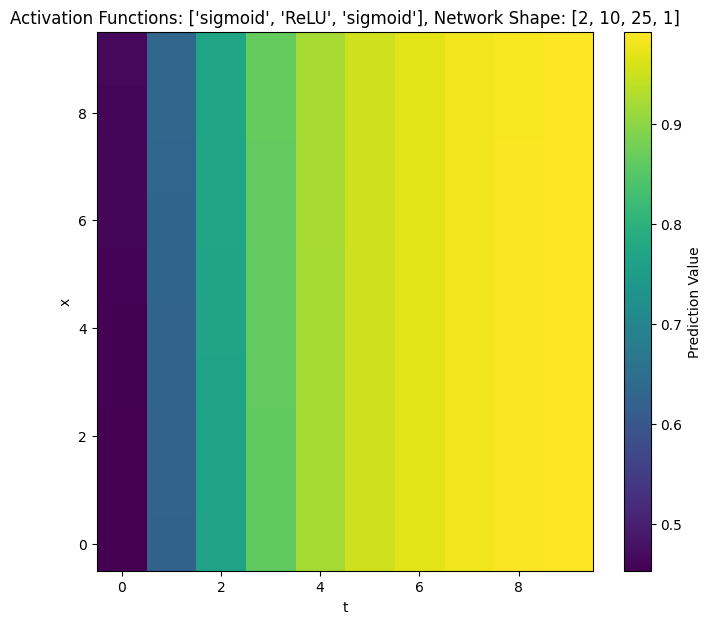

Training Network with [2, 10, 25, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.07s/it]


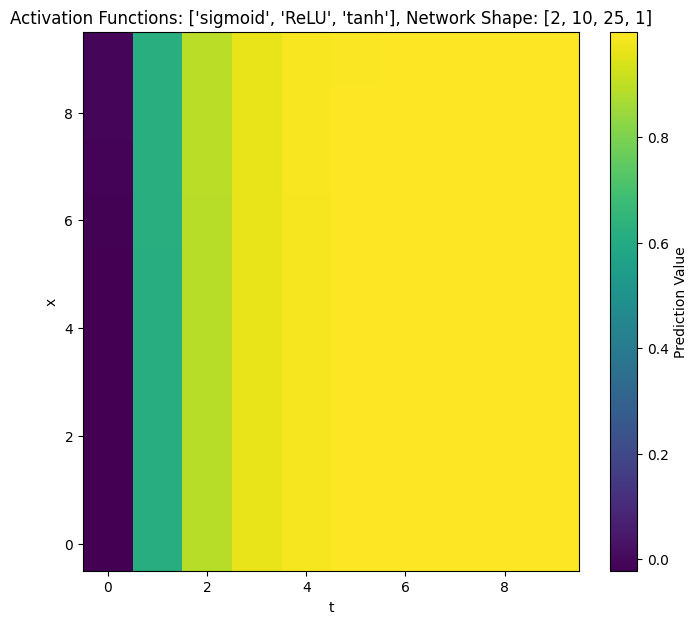

Training Network with [2, 10, 25, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:54<00:00,  1.35s/it]


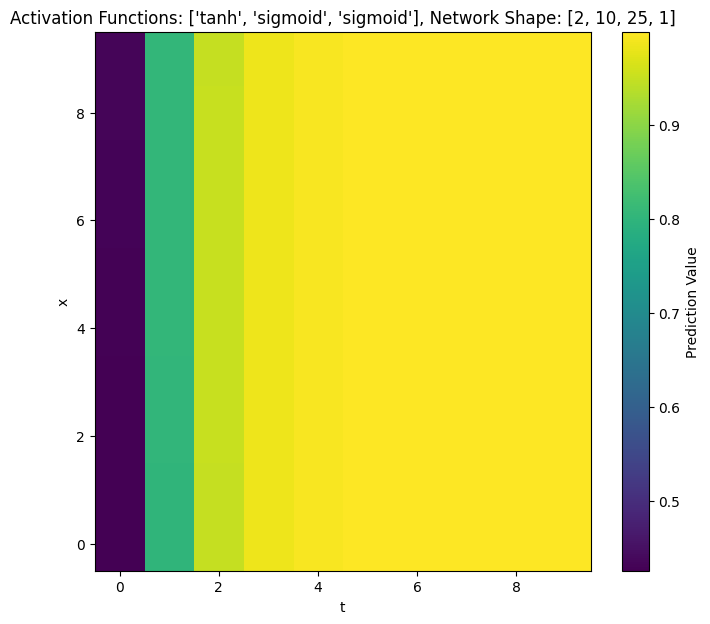

Training Network with [2, 10, 25, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


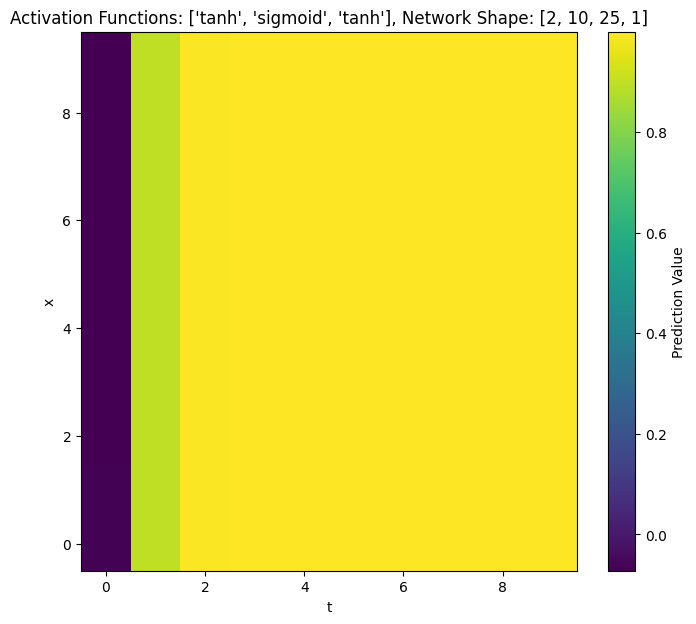

Training Network with [2, 10, 25, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.15s/it]


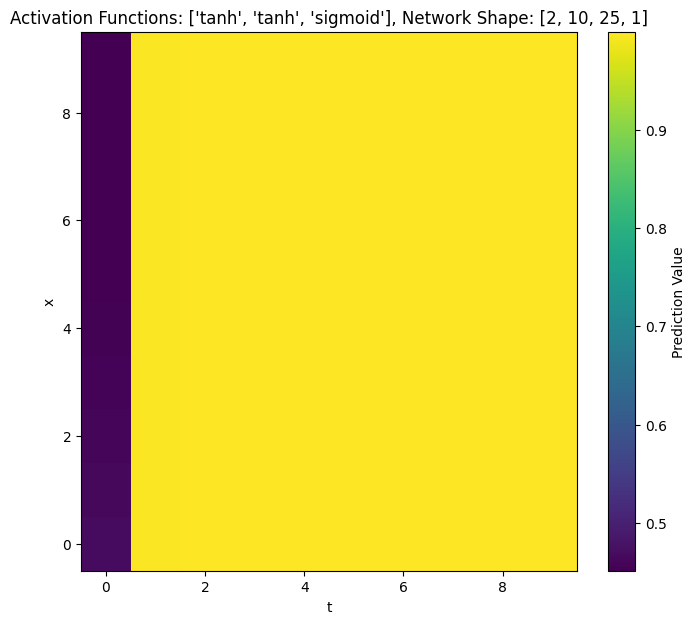

Training Network with [2, 10, 25, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


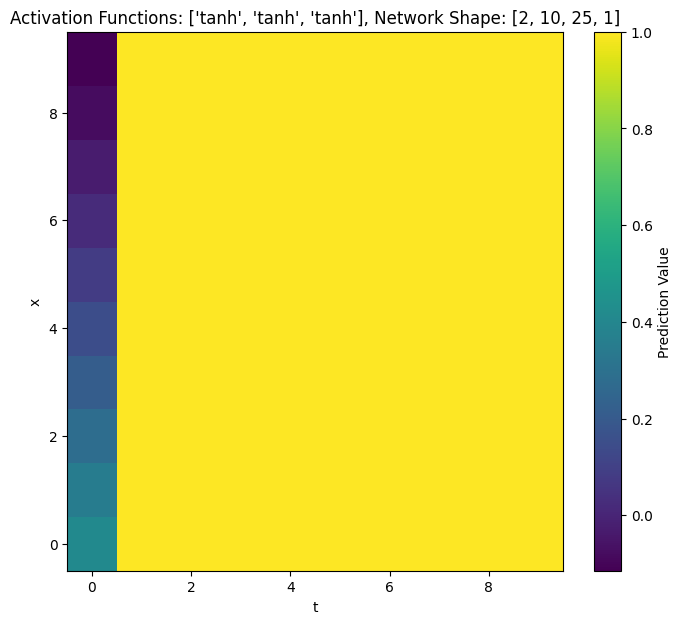

Training Network with [2, 10, 25, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:43<00:00,  1.10s/it]


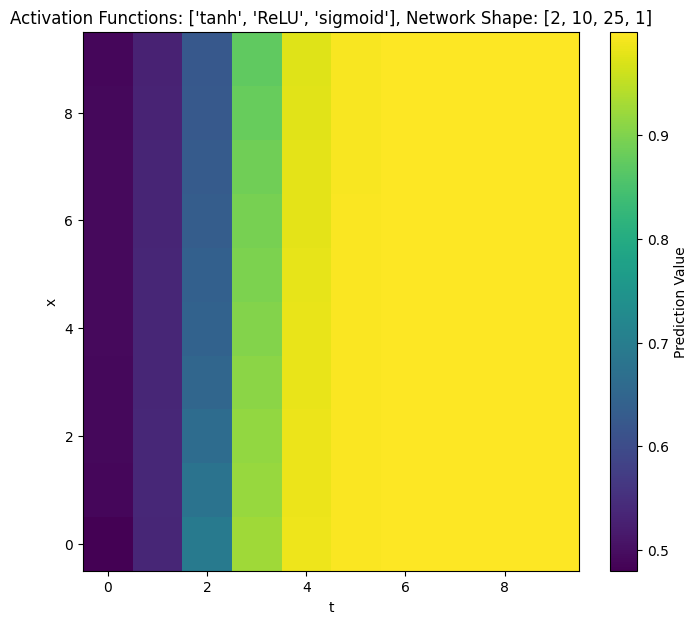

Training Network with [2, 10, 25, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


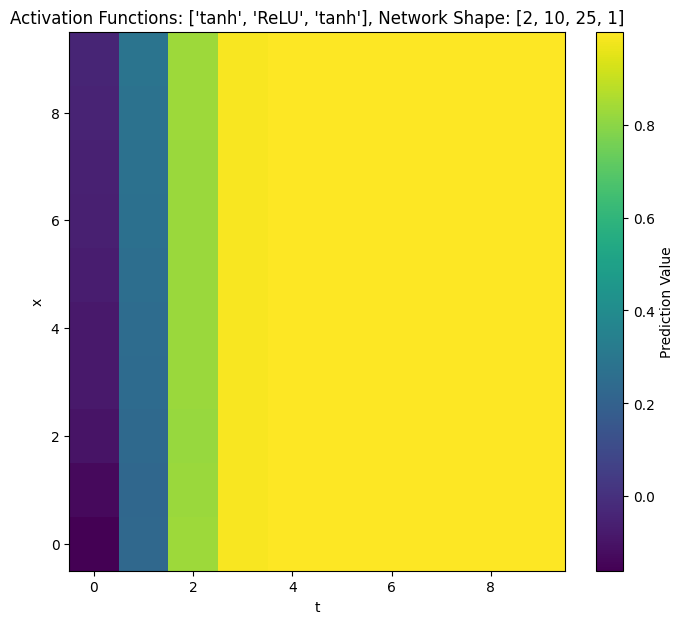

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:51<00:00,  1.28s/it]


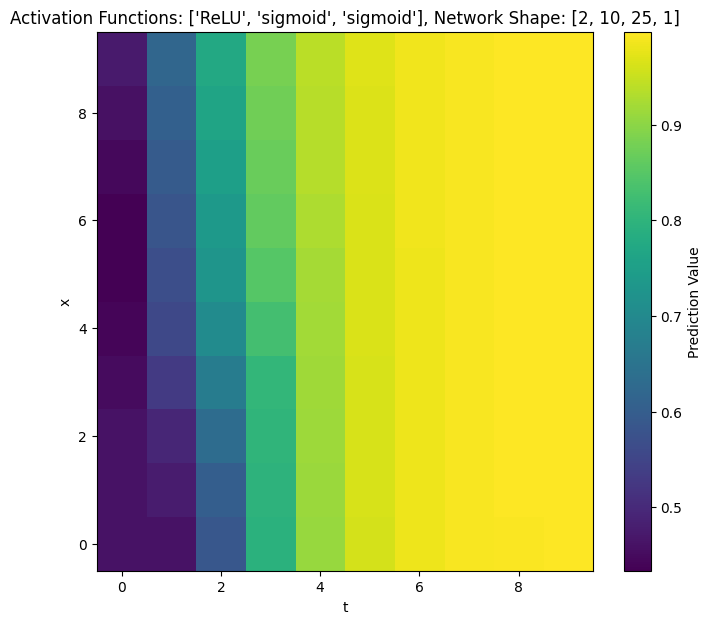

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:41<00:00,  1.03s/it]


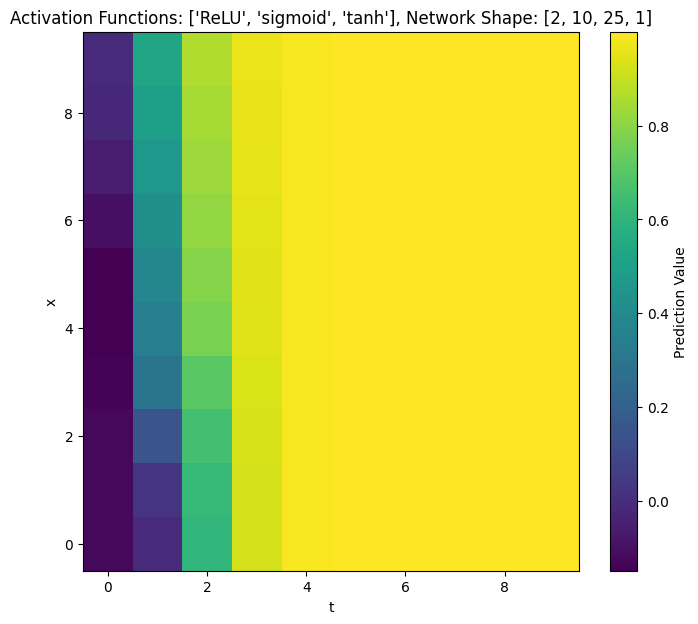

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:43<00:00,  1.10s/it]


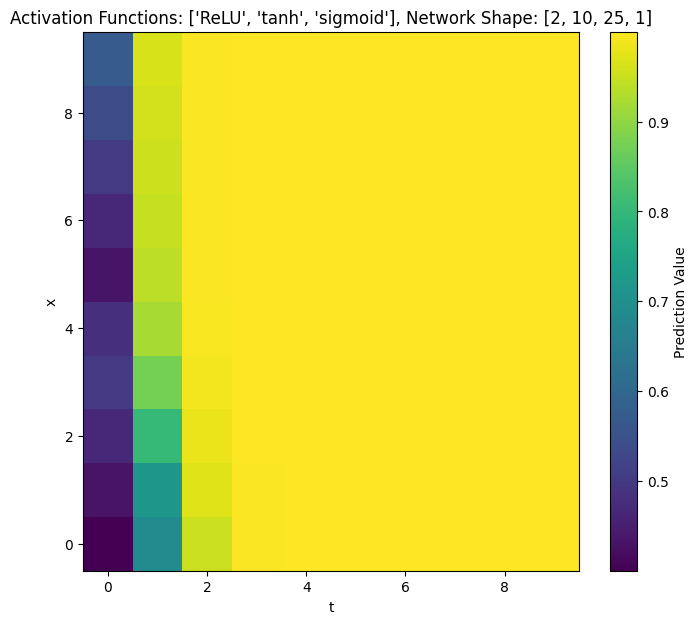

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


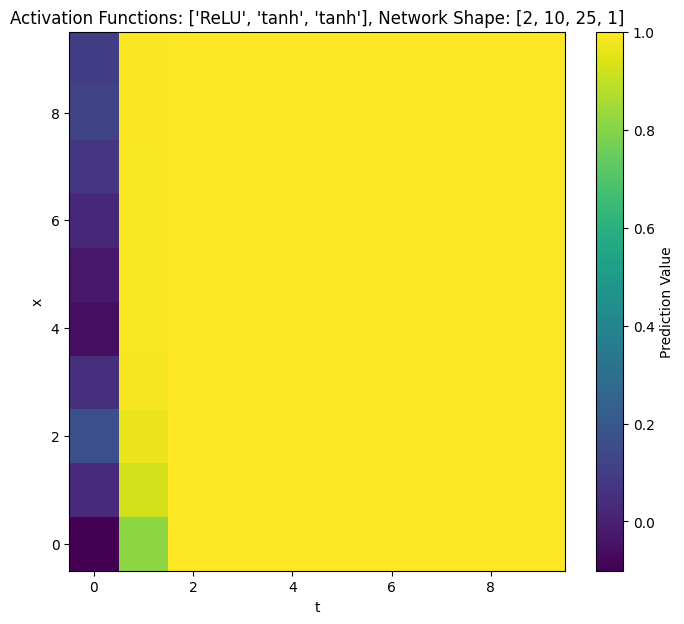

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


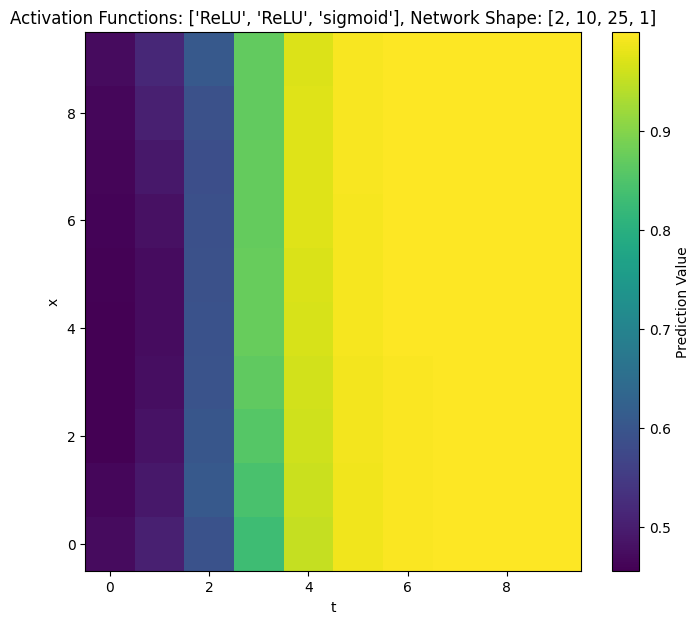

Training Network with [2, 10, 25, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:32<00:00,  1.22it/s]


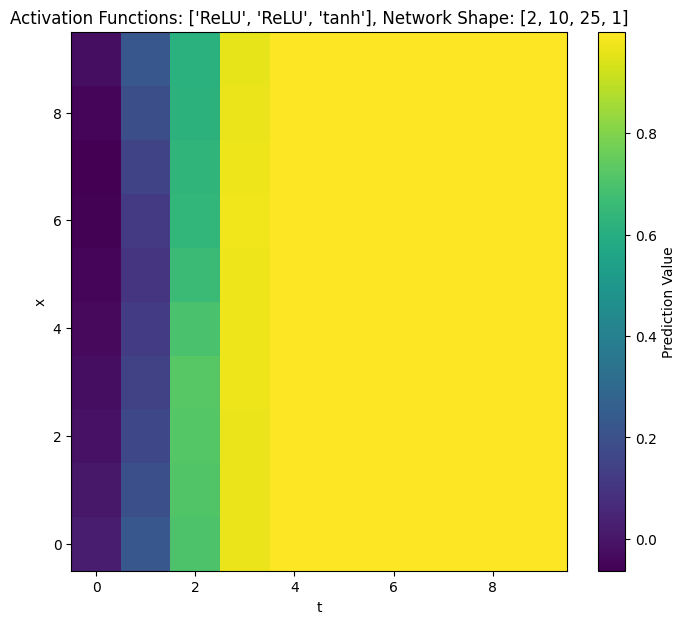

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:03<00:00,  1.60s/it]


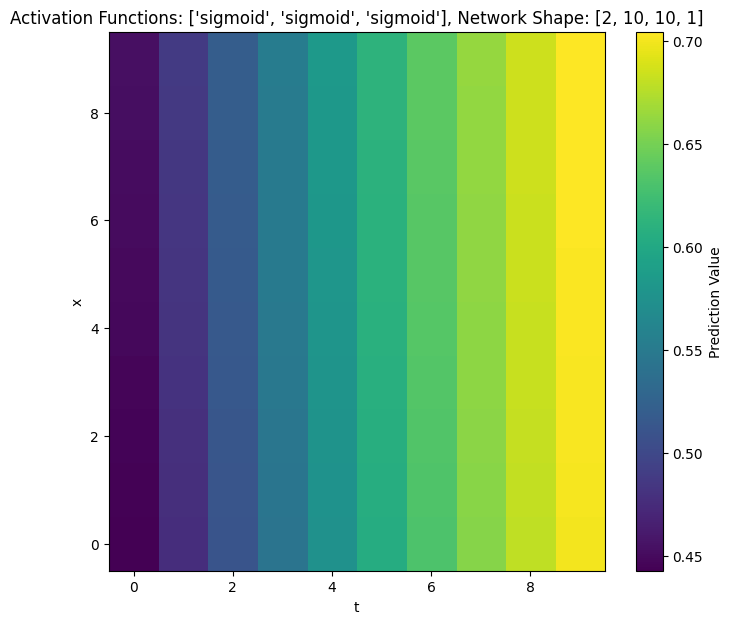

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


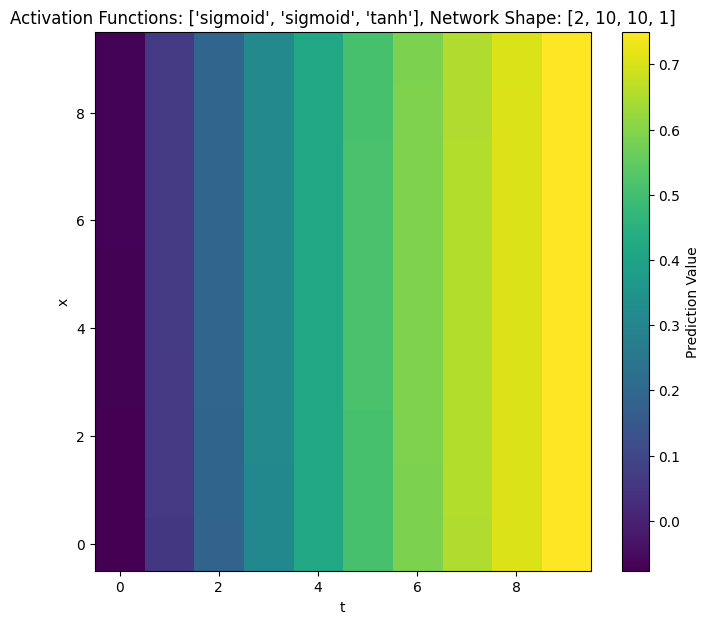

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:54<00:00,  1.37s/it]


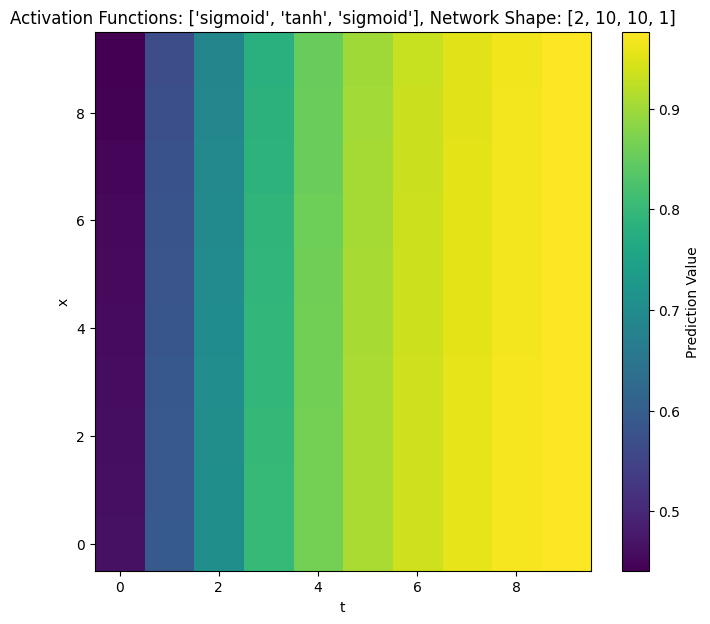

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


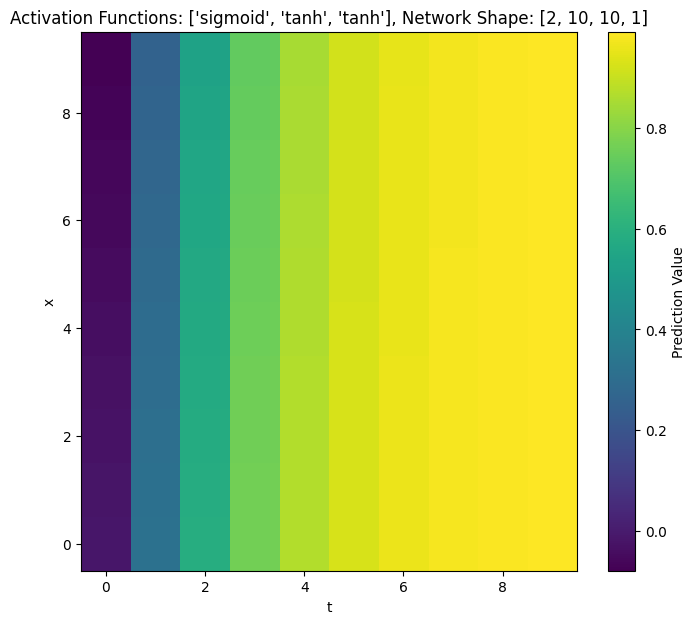

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:51<00:00,  1.29s/it]


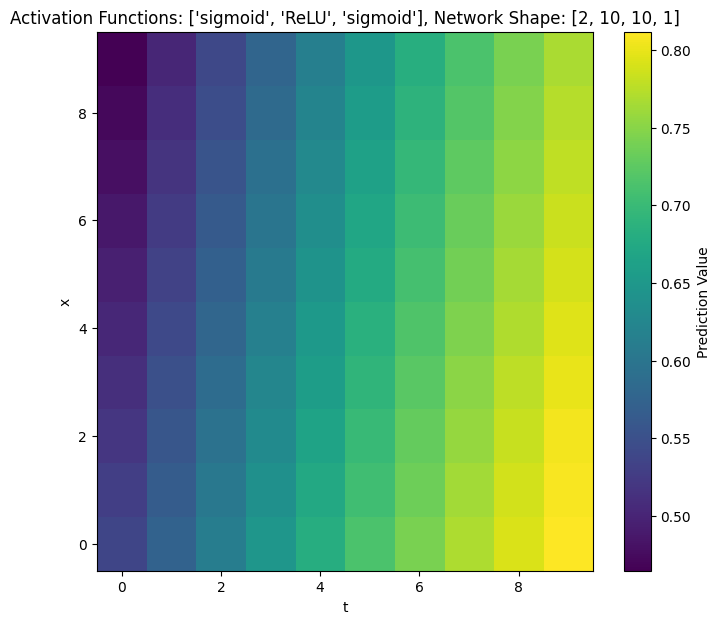

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.07s/it]


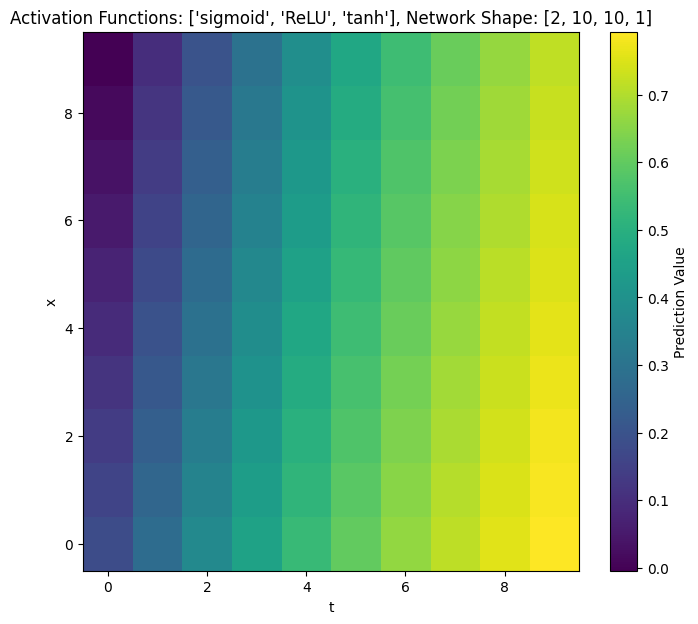

Training Network with [2, 10, 10, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.35s/it]


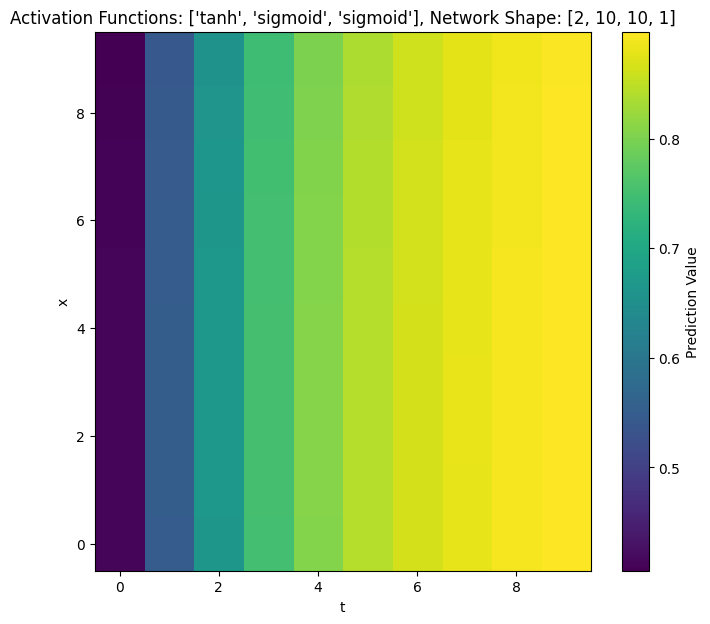

Training Network with [2, 10, 10, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


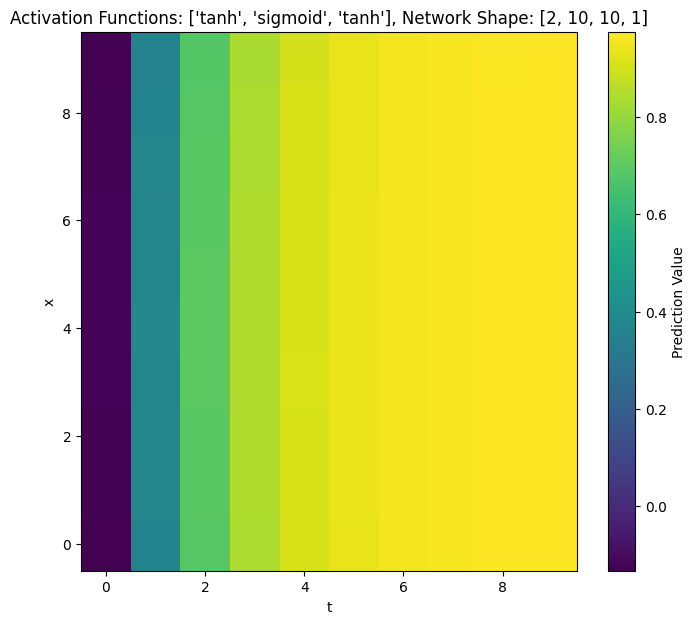

Training Network with [2, 10, 10, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:46<00:00,  1.17s/it]


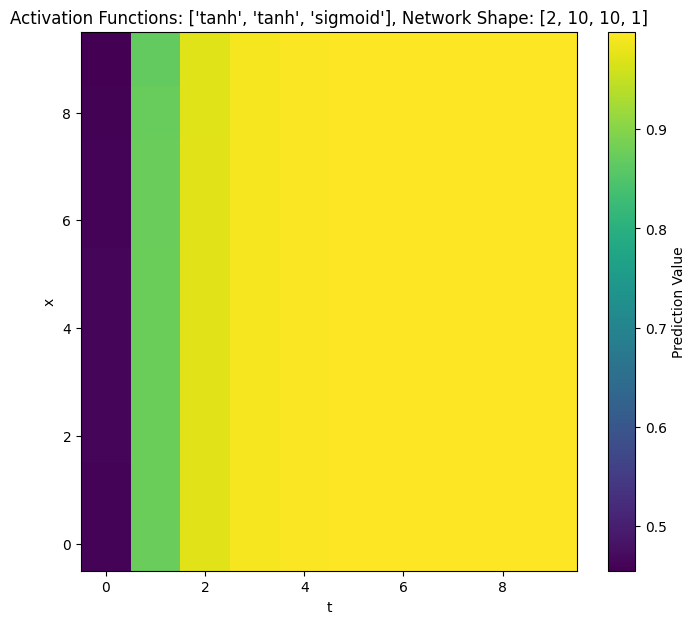

Training Network with [2, 10, 10, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


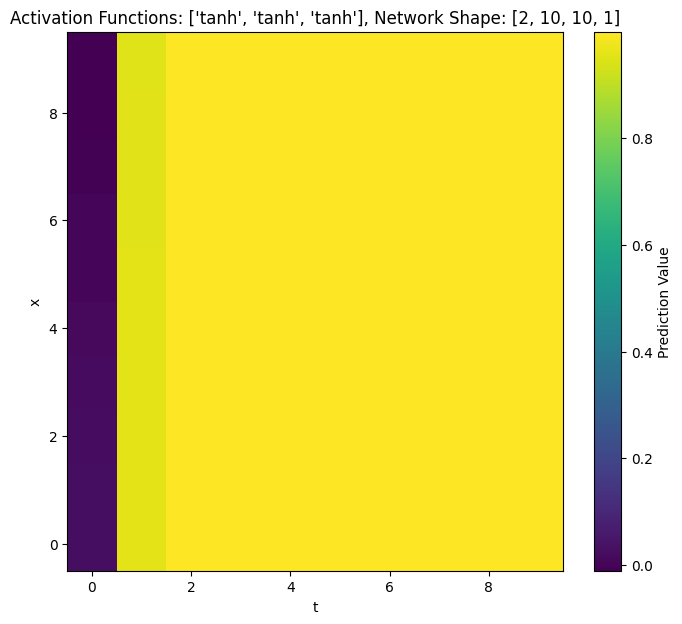

Training Network with [2, 10, 10, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


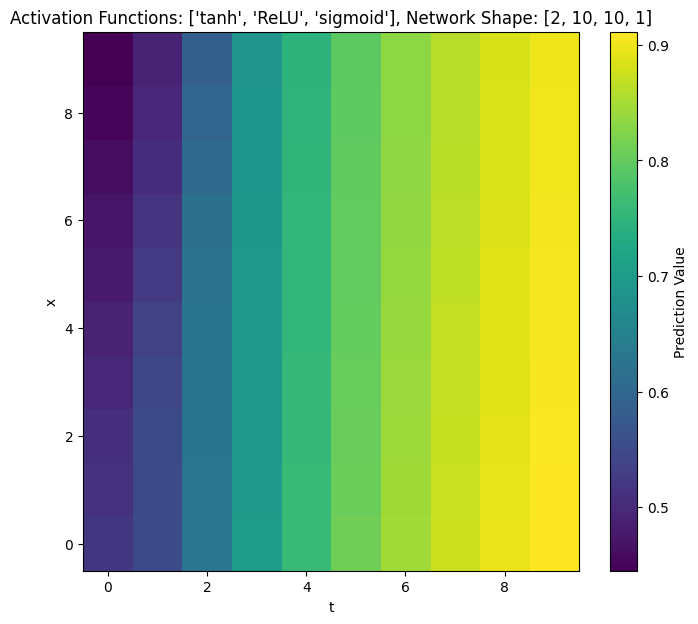

Training Network with [2, 10, 10, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


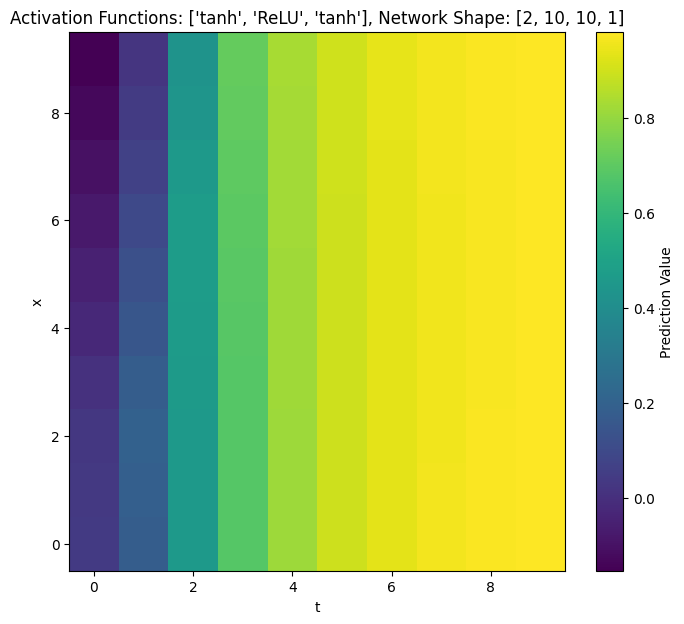

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


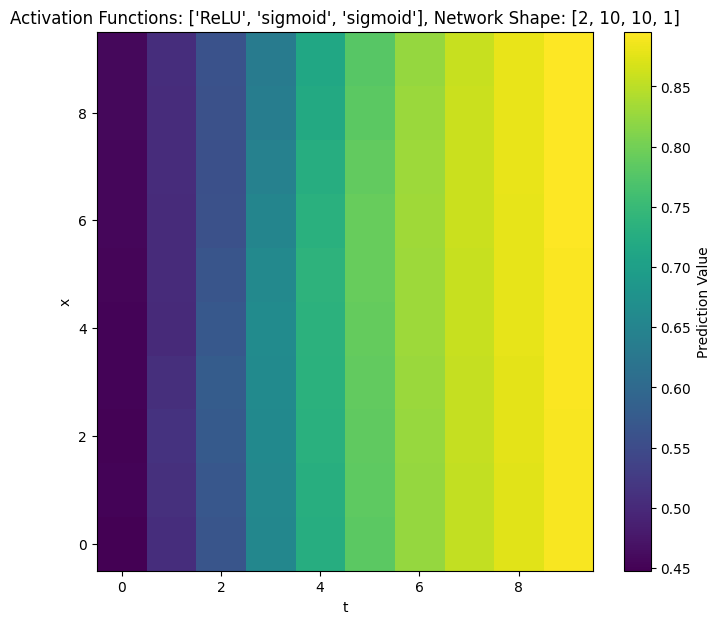

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]


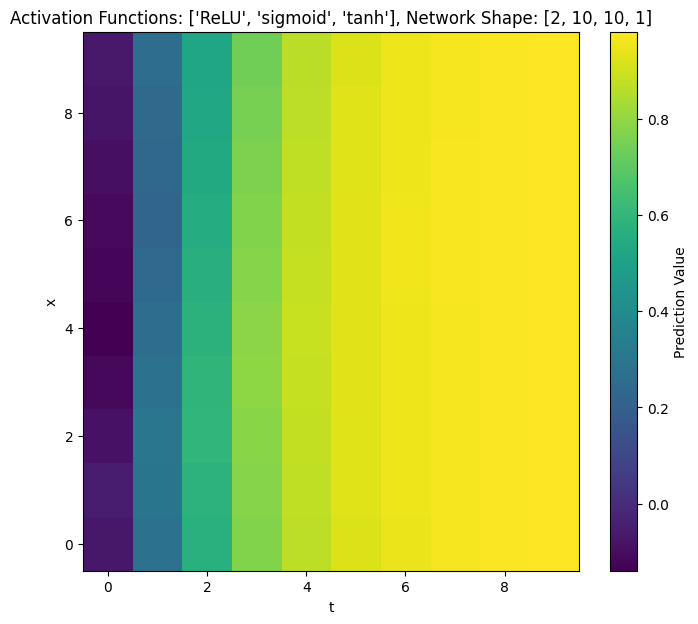

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


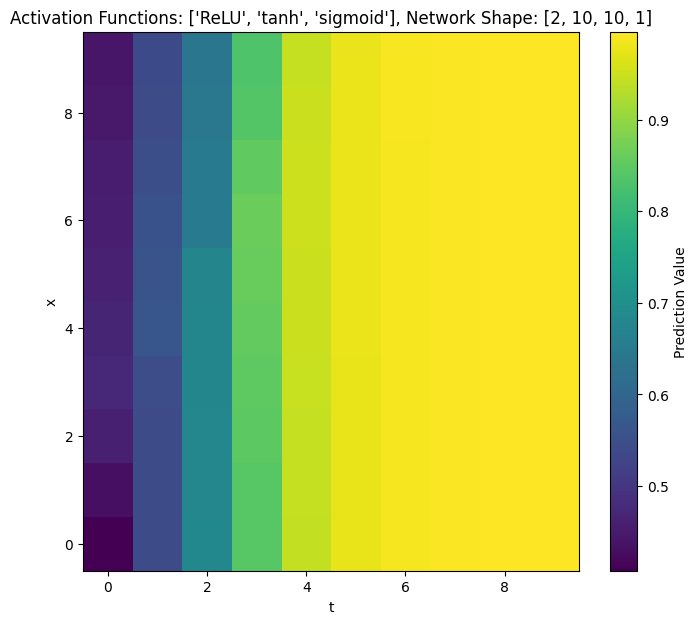

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.11it/s]


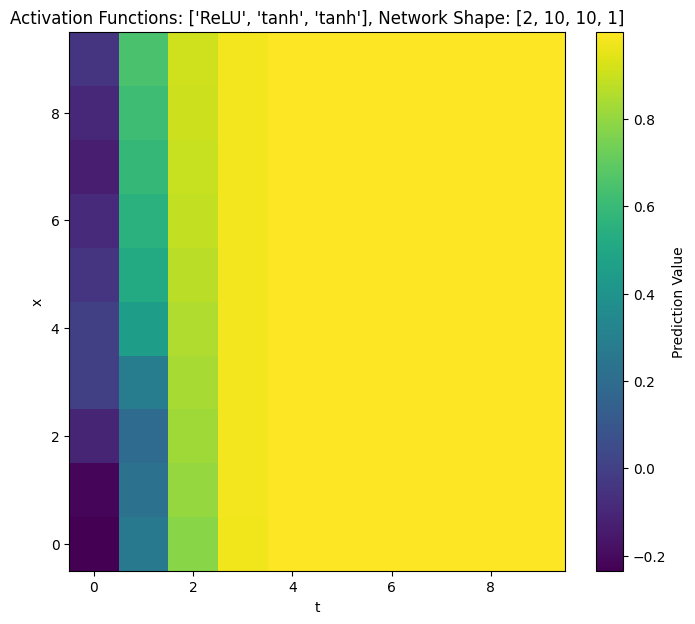

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


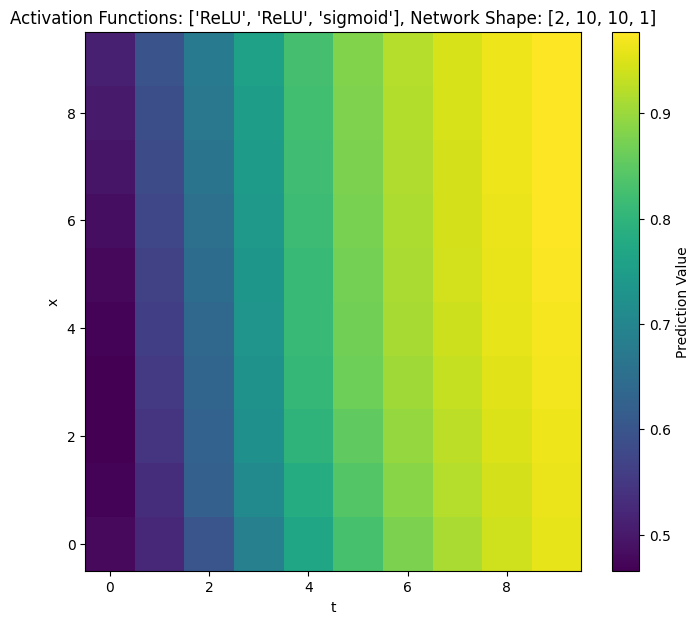

Training Network with [2, 10, 10, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


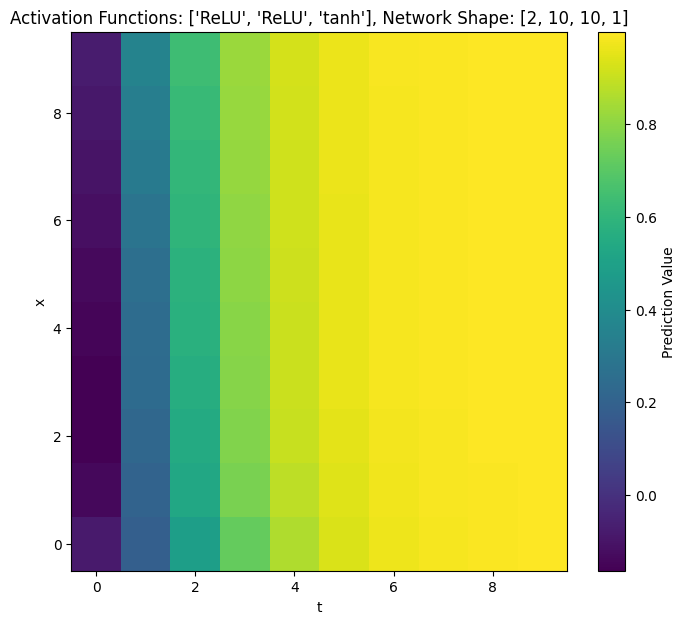

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:04<00:00,  1.61s/it]


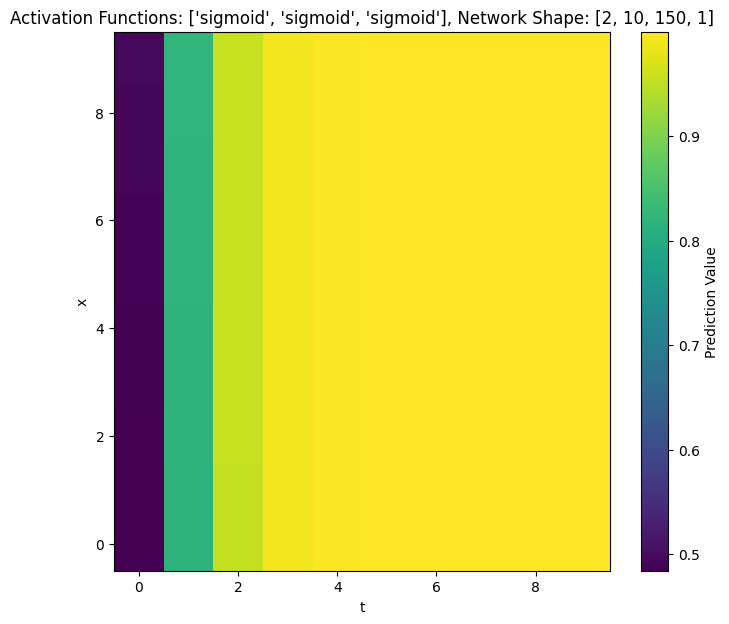

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


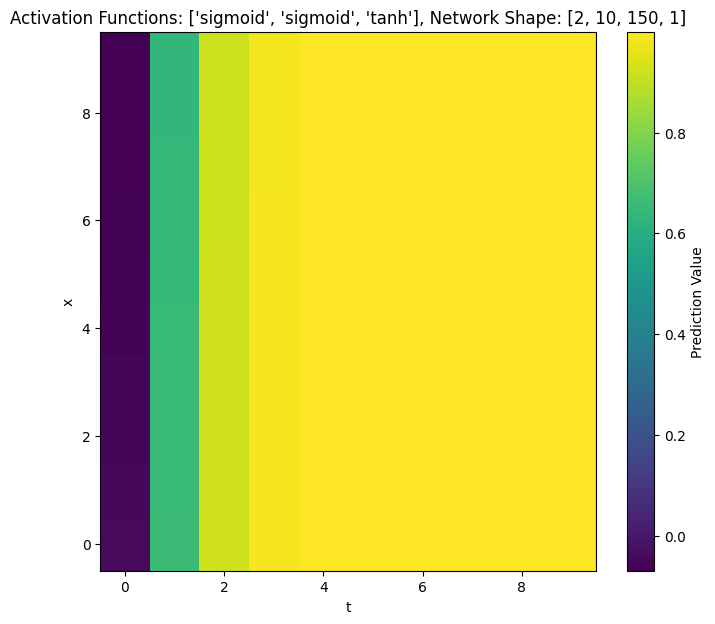

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.39s/it]


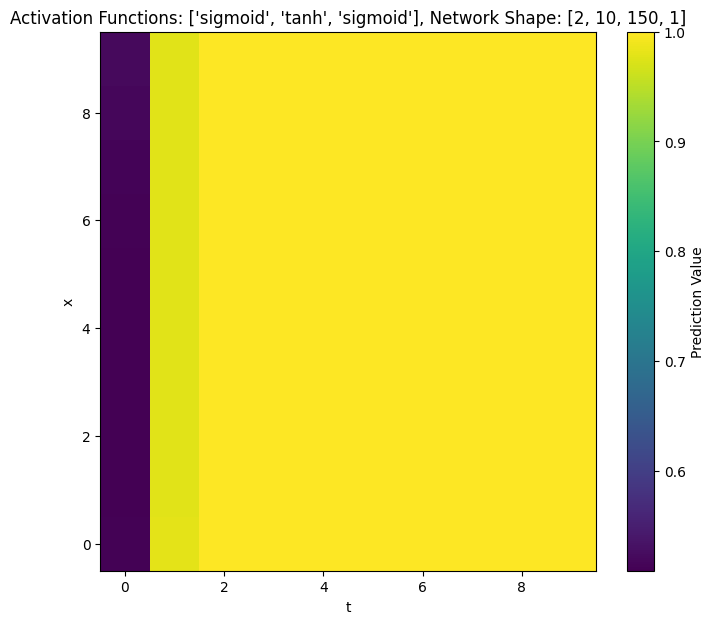

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.15s/it]


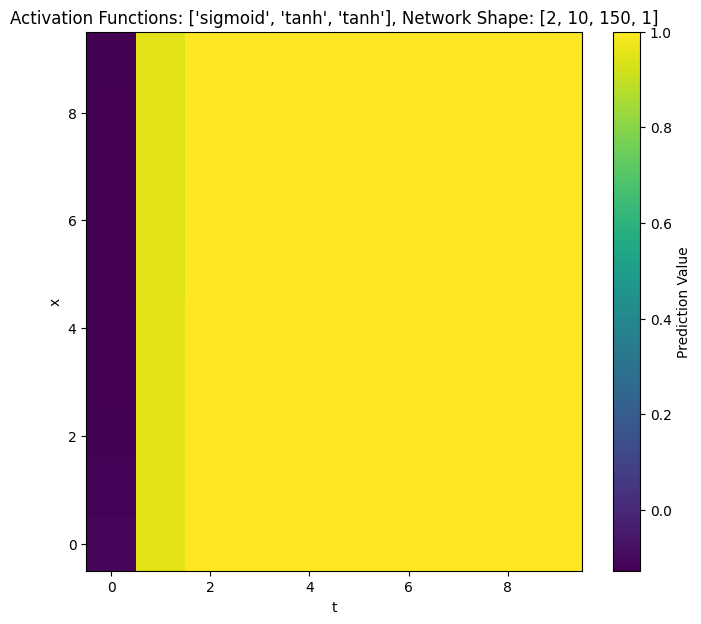

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.31s/it]


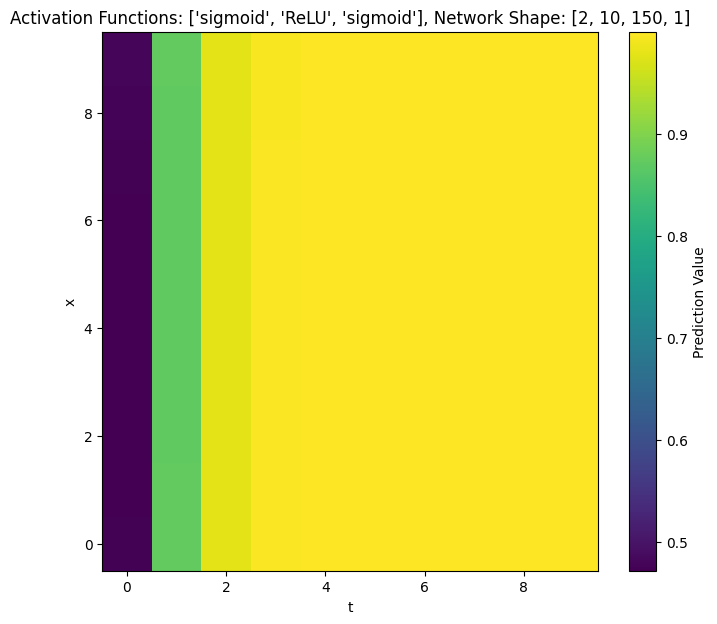

Training Network with [2, 10, 150, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


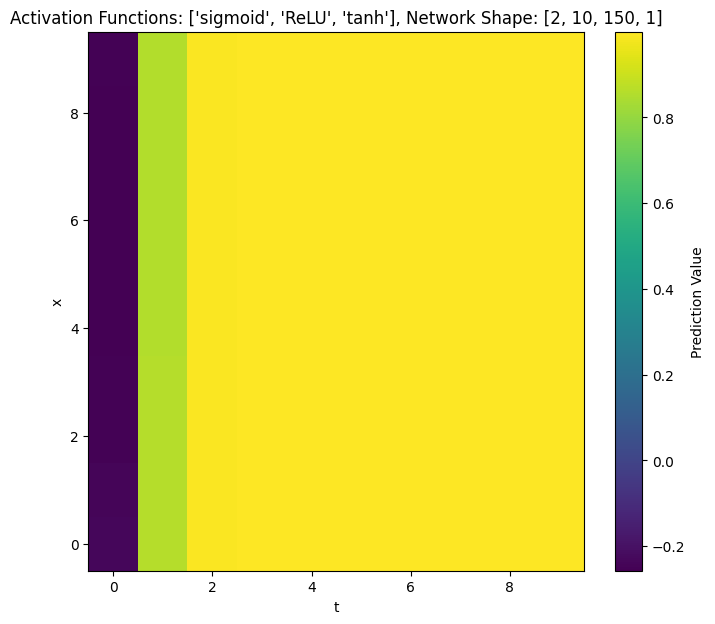

Training Network with [2, 10, 150, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:56<00:00,  1.41s/it]


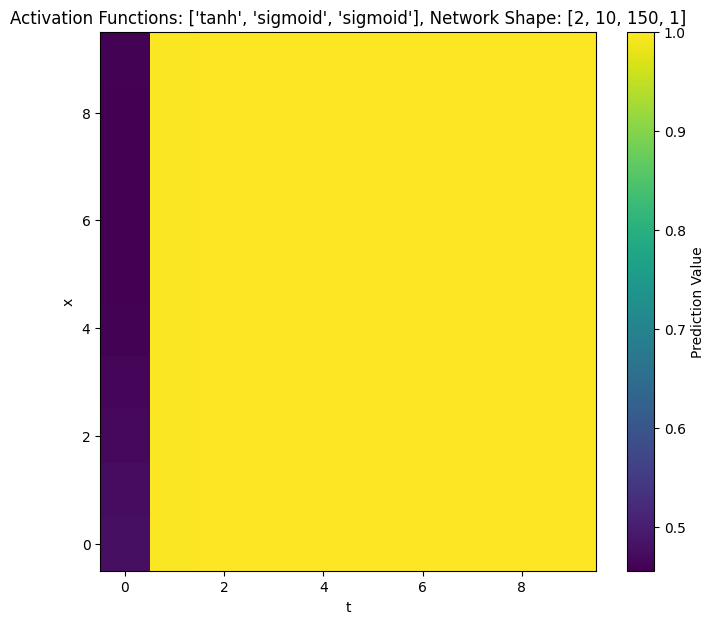

Training Network with [2, 10, 150, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:47<00:00,  1.18s/it]


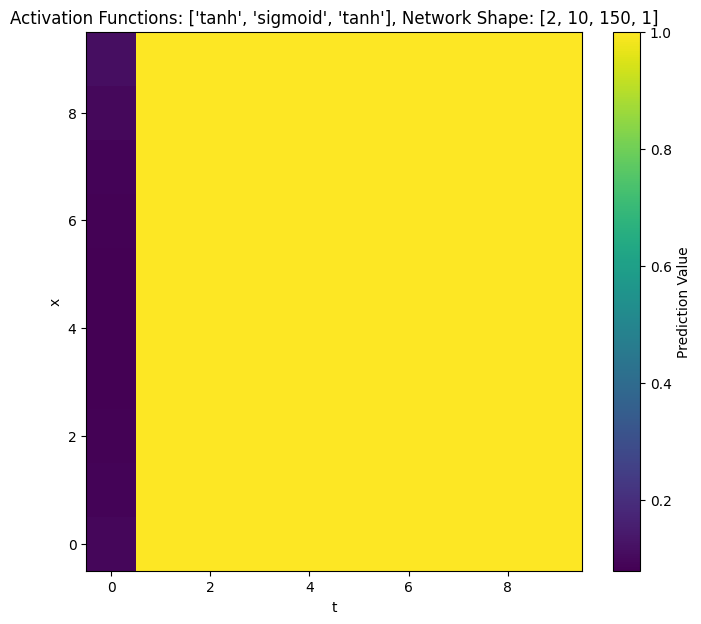

Training Network with [2, 10, 150, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:47<00:00,  1.20s/it]


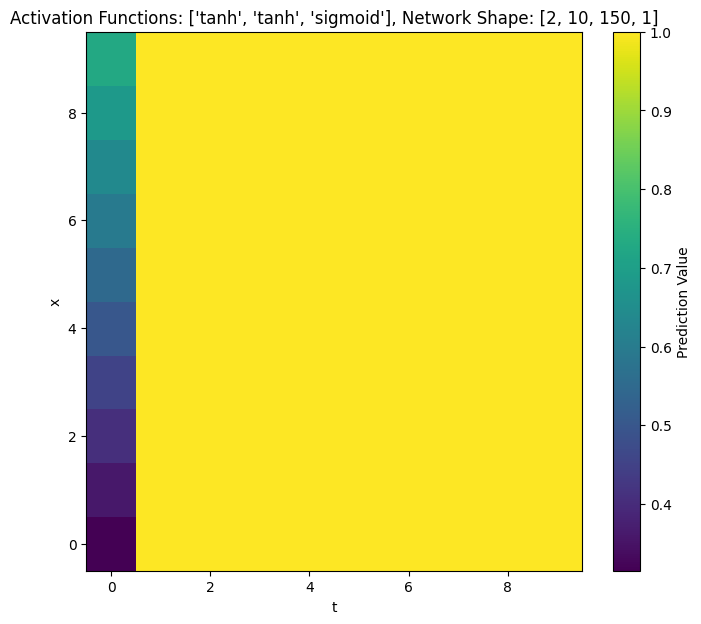

Training Network with [2, 10, 150, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


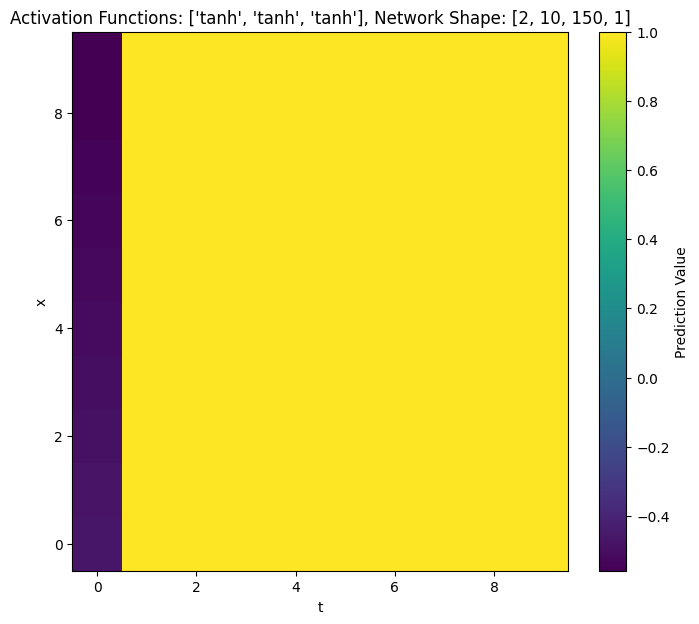

Training Network with [2, 10, 150, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:44<00:00,  1.11s/it]


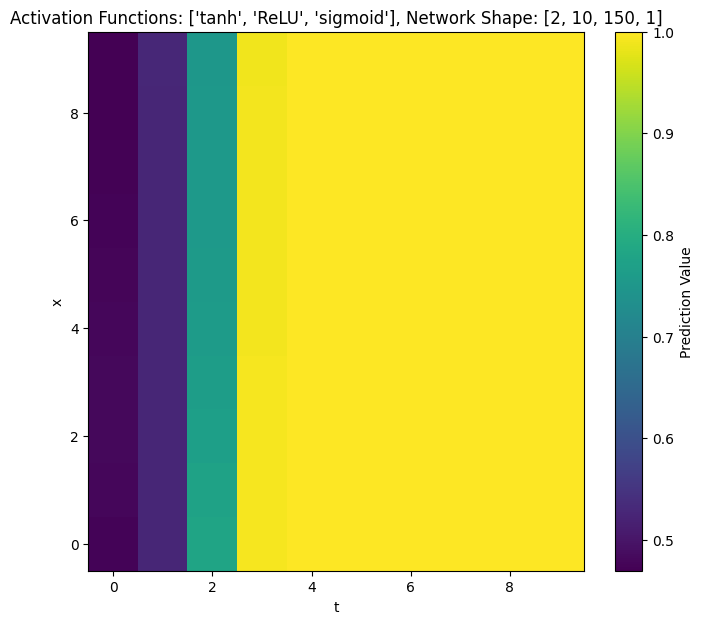

Training Network with [2, 10, 150, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.08it/s]


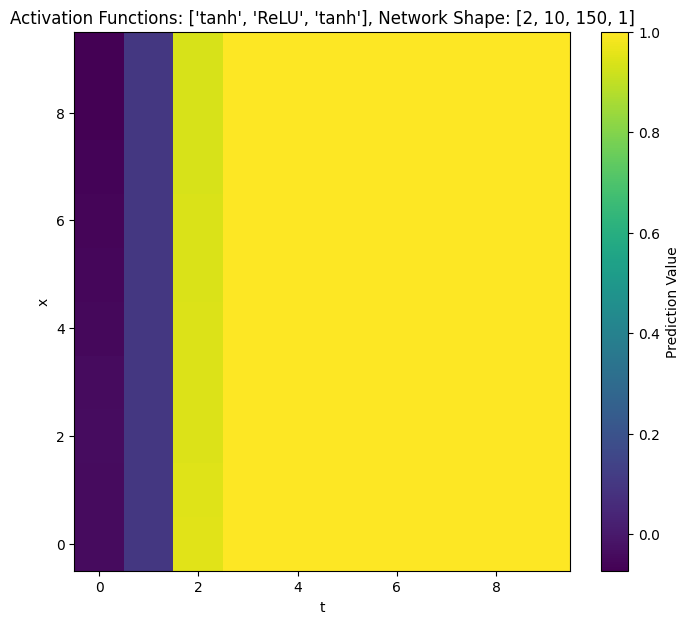

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


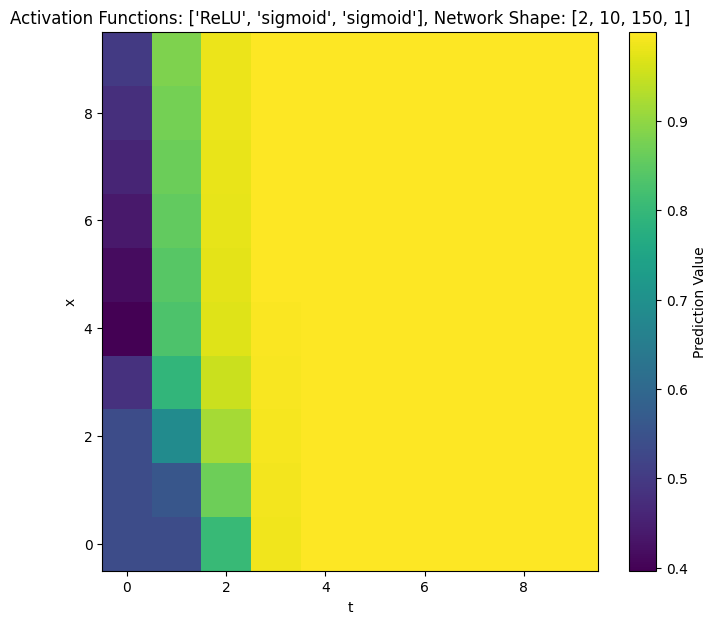

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


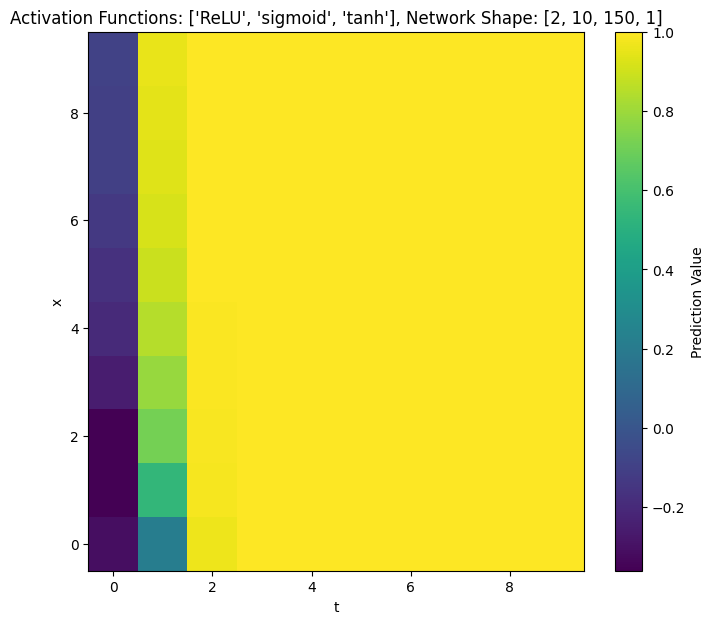

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


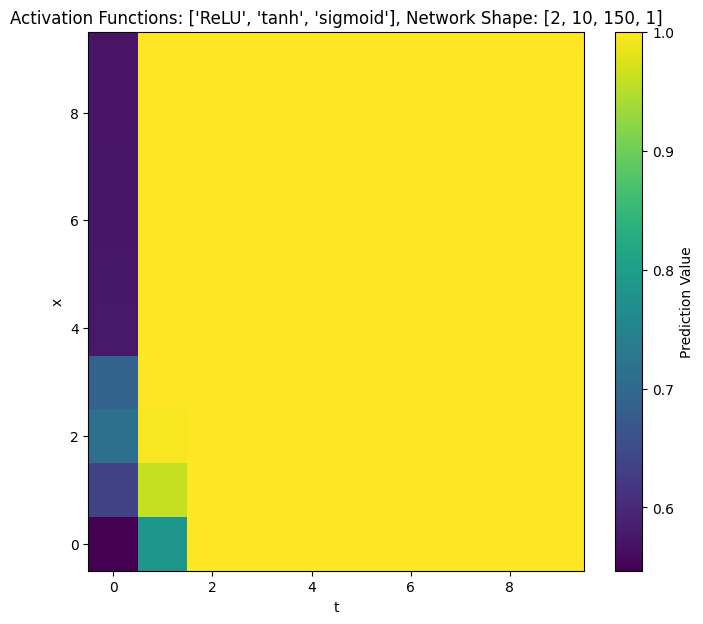

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


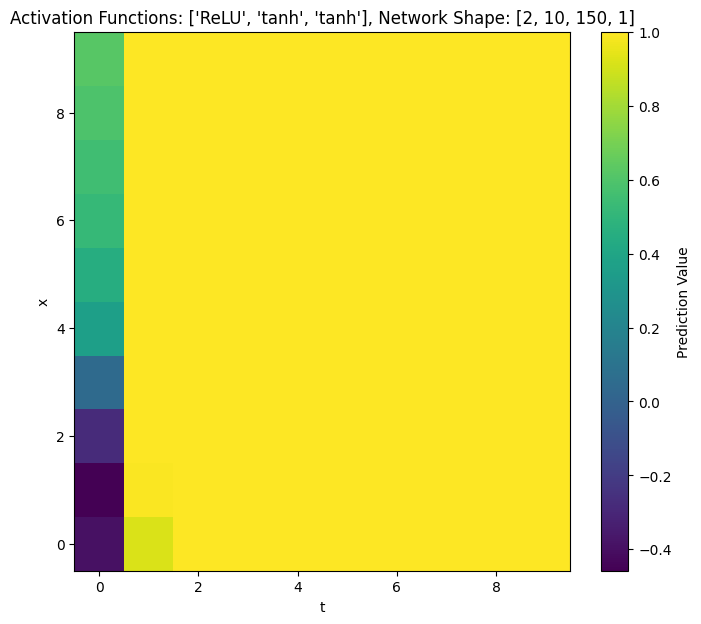

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


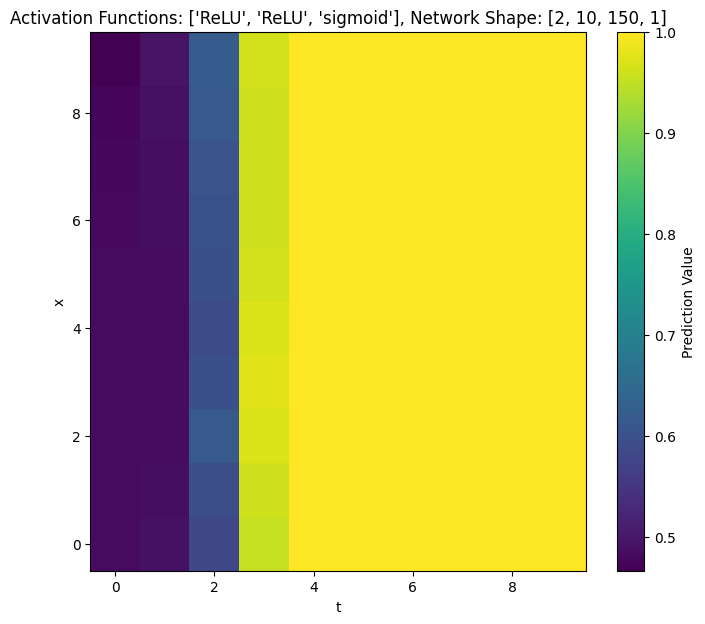

Training Network with [2, 10, 150, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:33<00:00,  1.19it/s]


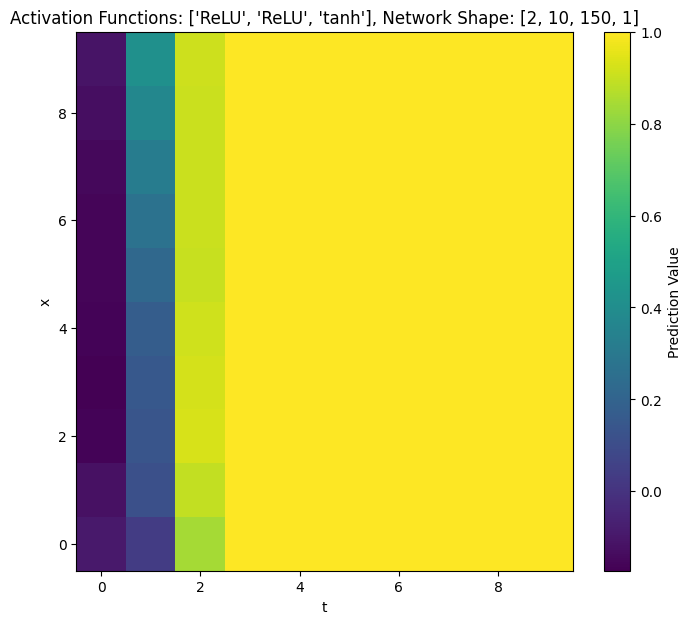

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:05<00:00,  1.63s/it]


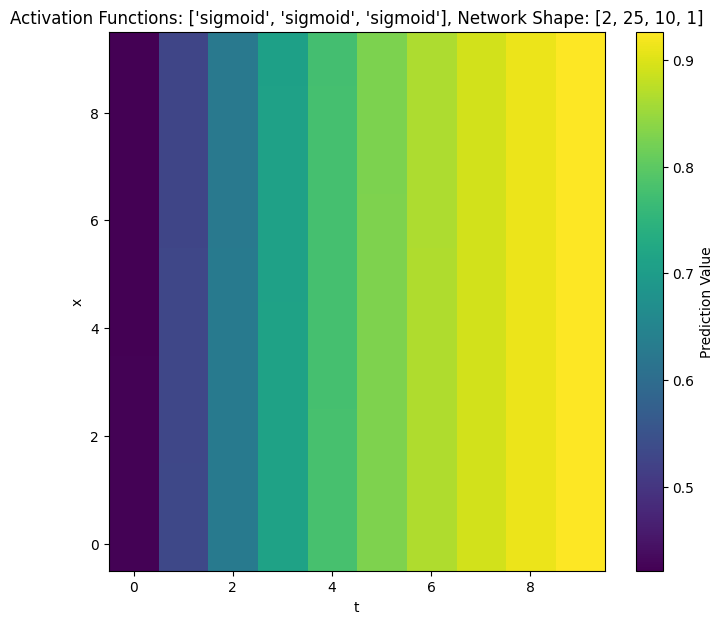

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


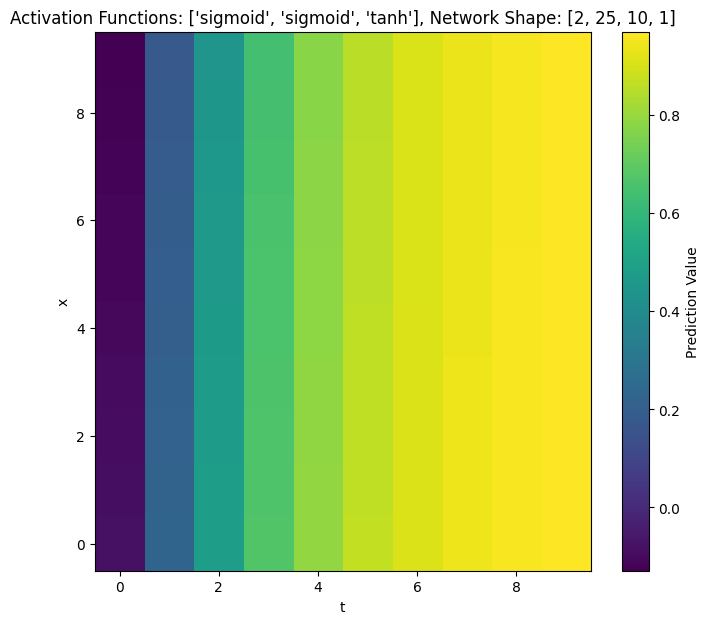

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


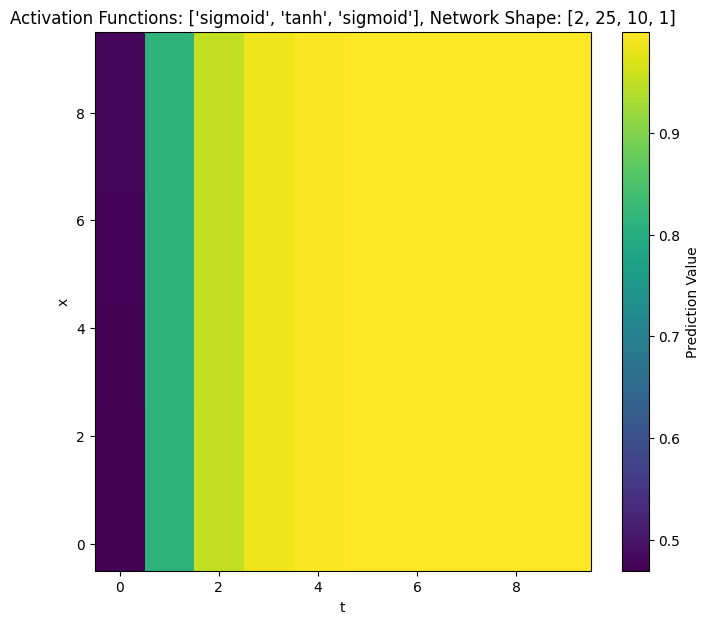

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


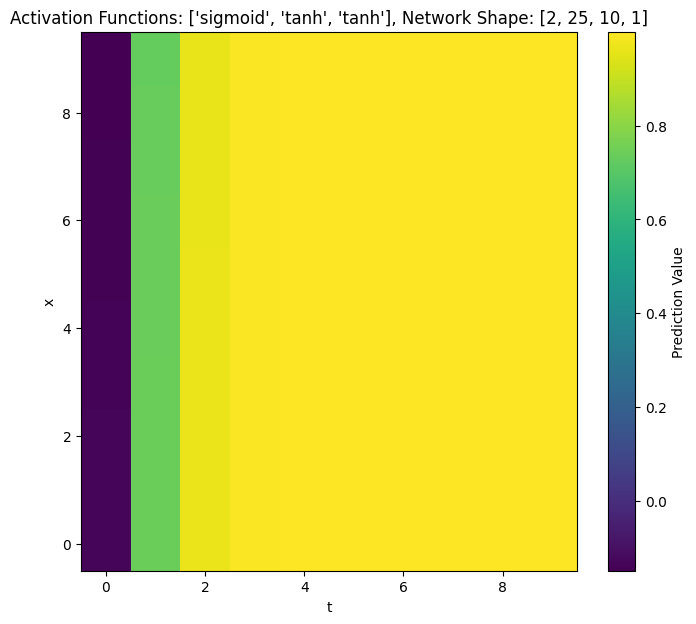

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.33s/it]


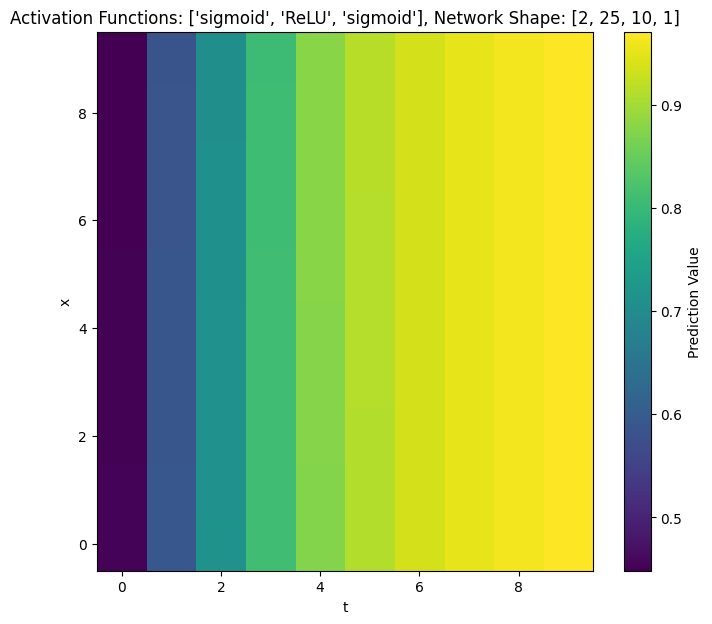

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.05s/it]


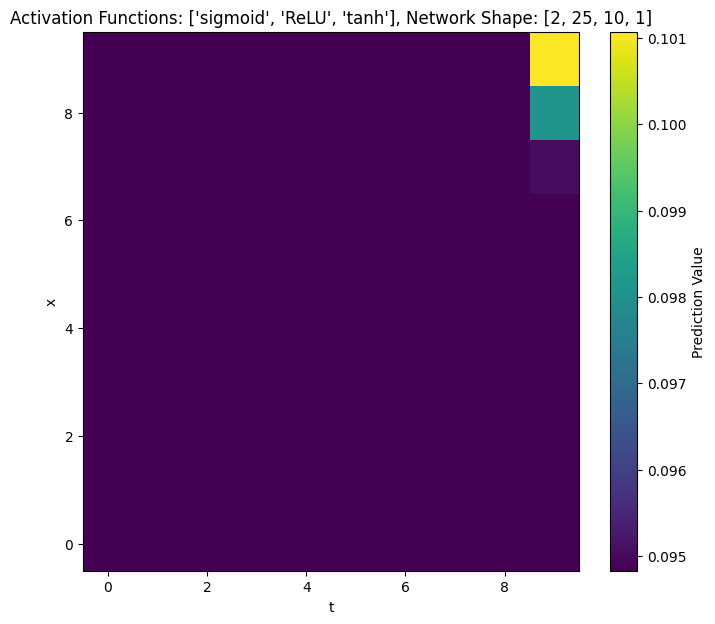

Training Network with [2, 25, 10, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.39s/it]


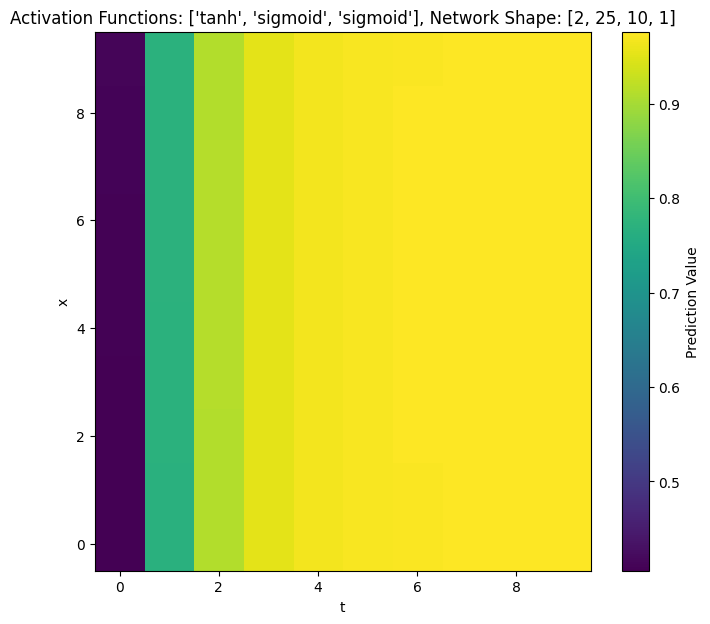

Training Network with [2, 25, 10, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:46<00:00,  1.15s/it]


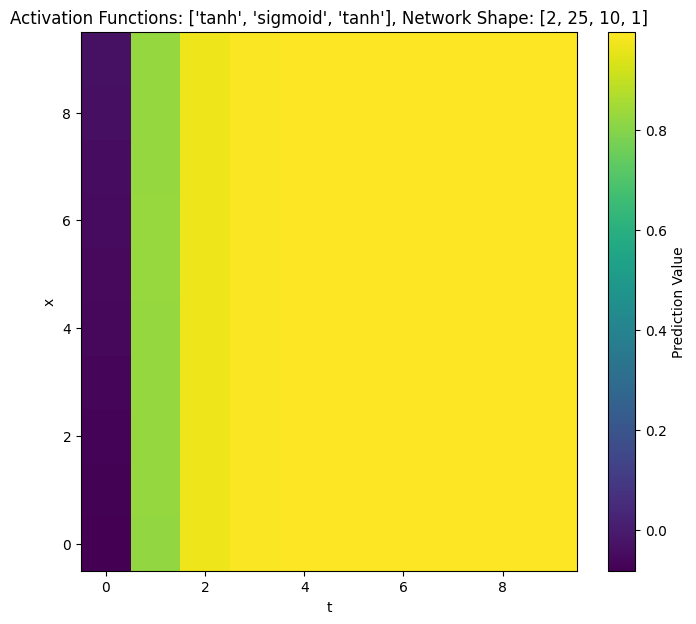

Training Network with [2, 25, 10, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:47<00:00,  1.19s/it]


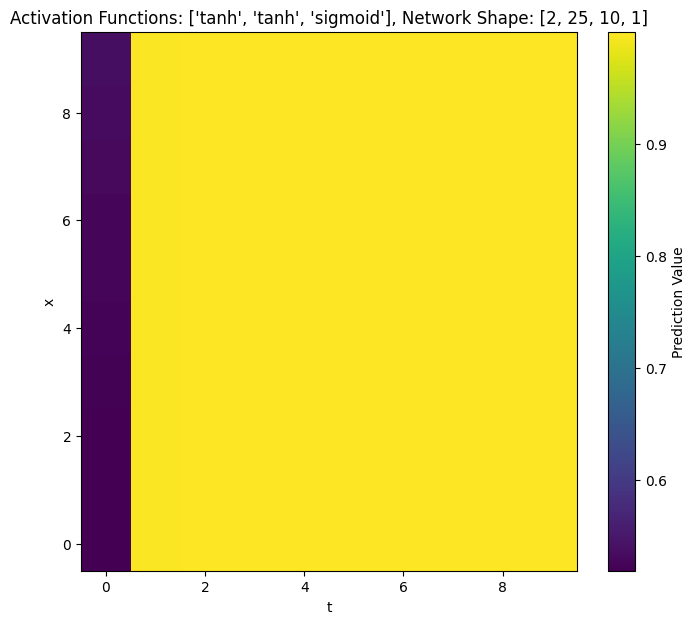

Training Network with [2, 25, 10, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


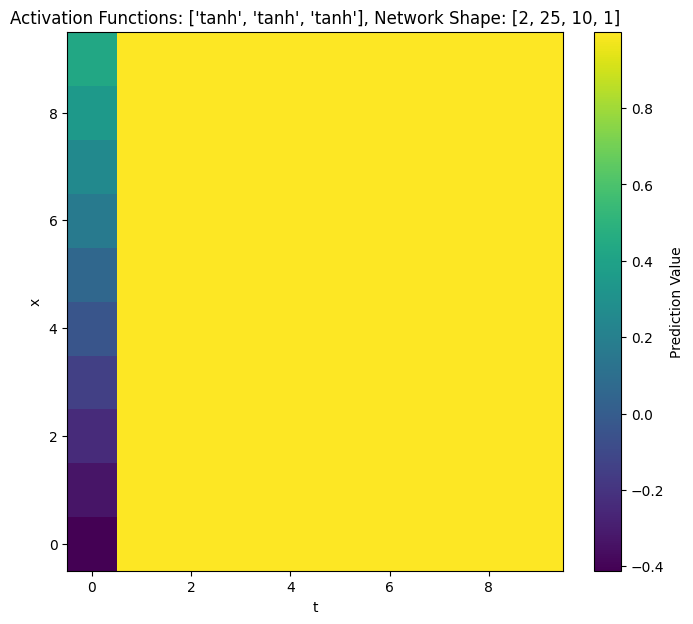

Training Network with [2, 25, 10, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


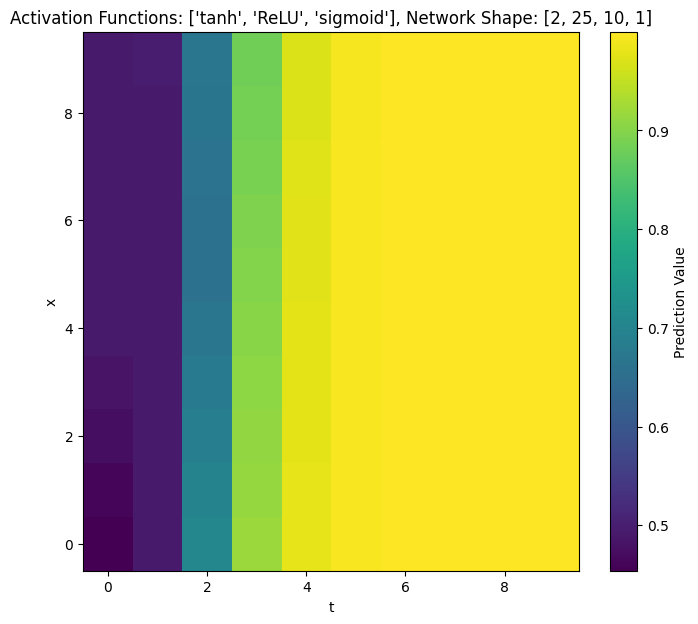

Training Network with [2, 25, 10, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


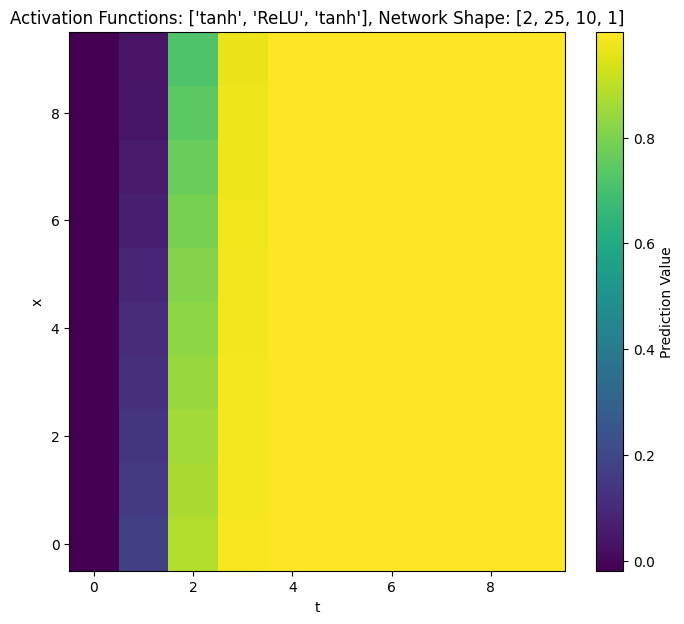

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.31s/it]


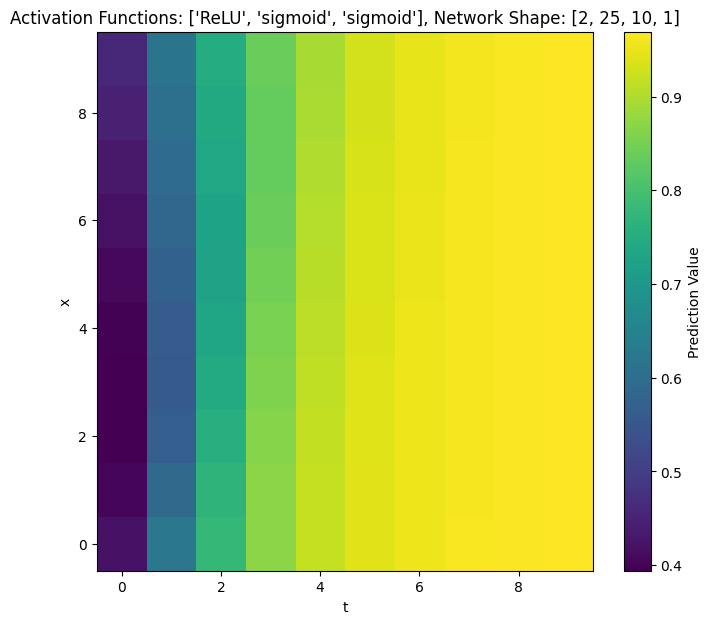

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:43<00:00,  1.09s/it]


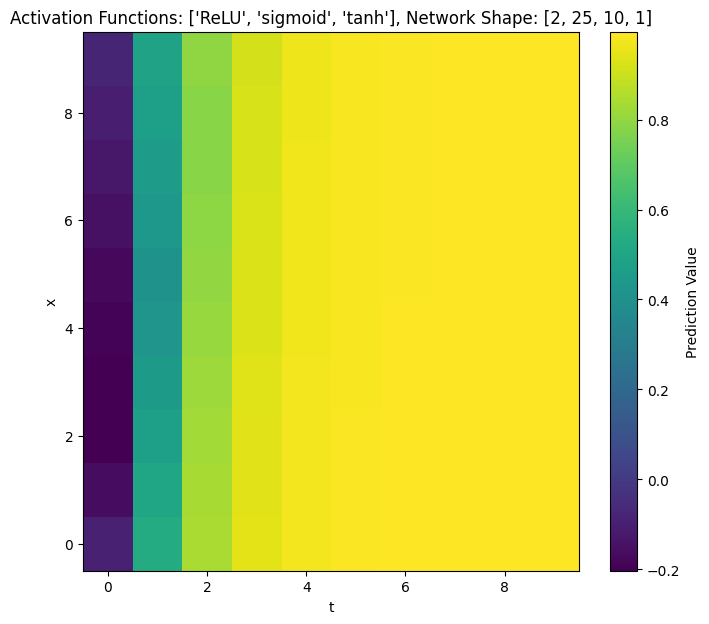

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


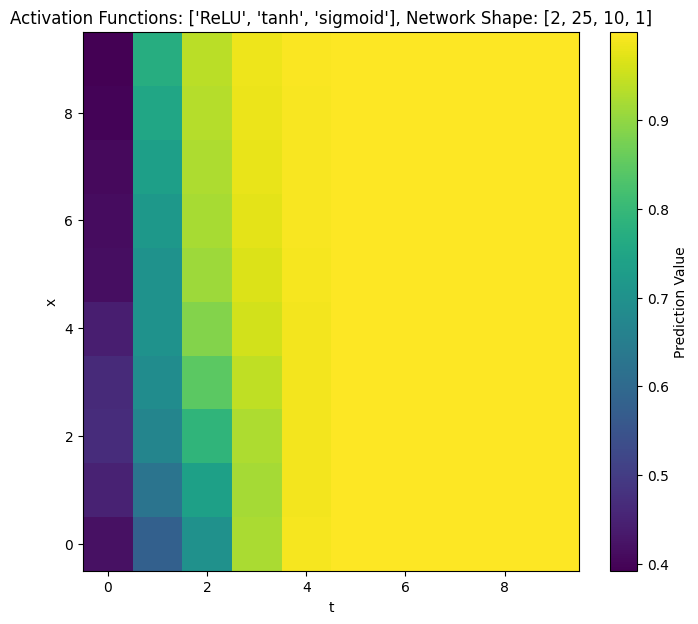

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


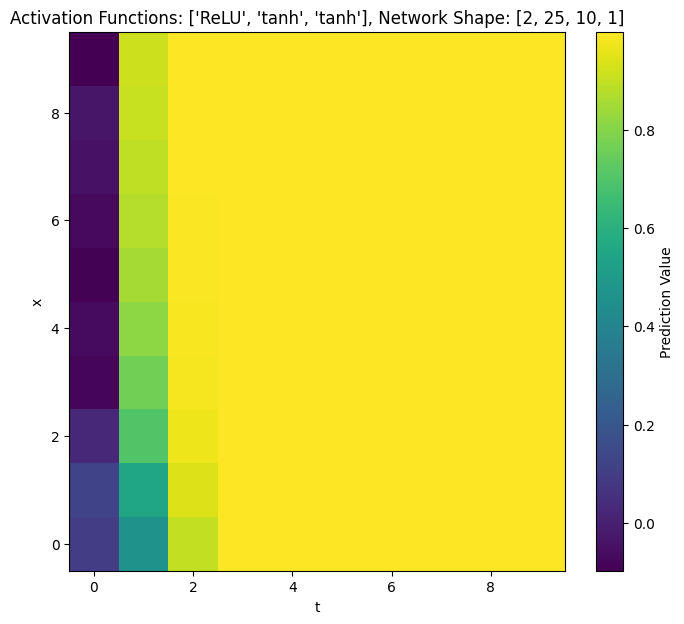

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.05s/it]


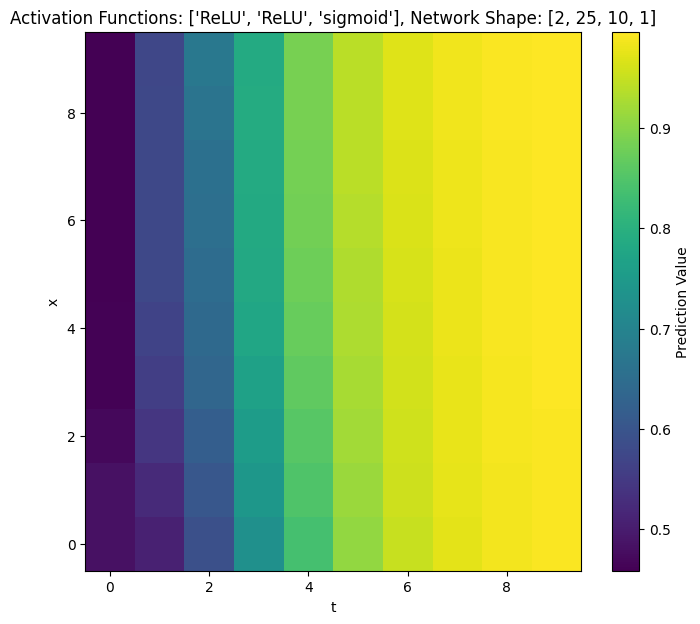

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:34<00:00,  1.17it/s]


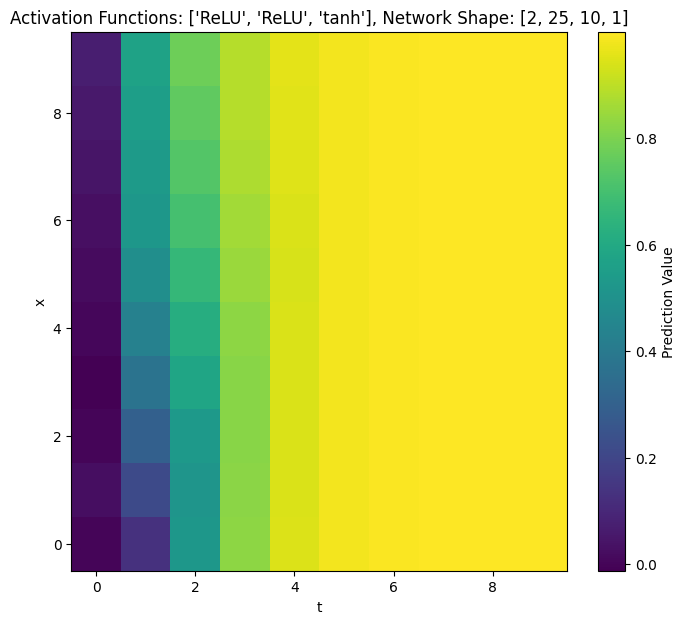

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:05<00:00,  1.64s/it]


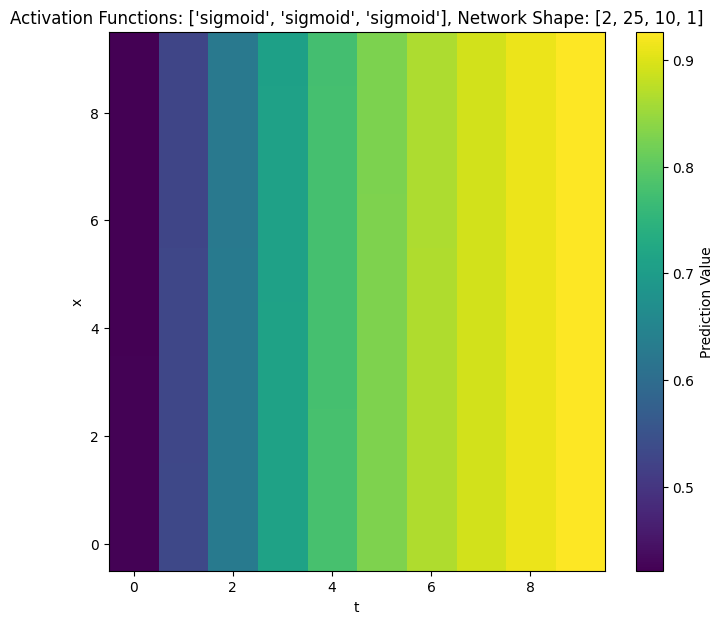

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:54<00:00,  1.35s/it]


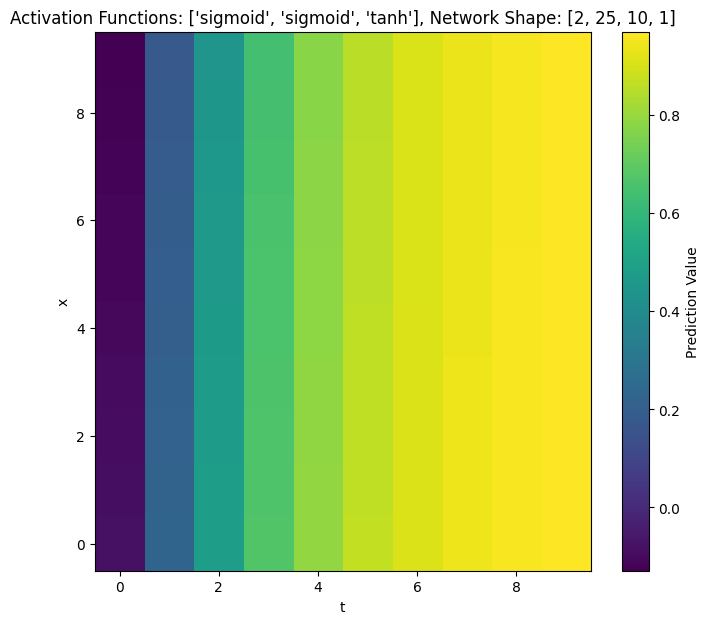

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:54<00:00,  1.36s/it]


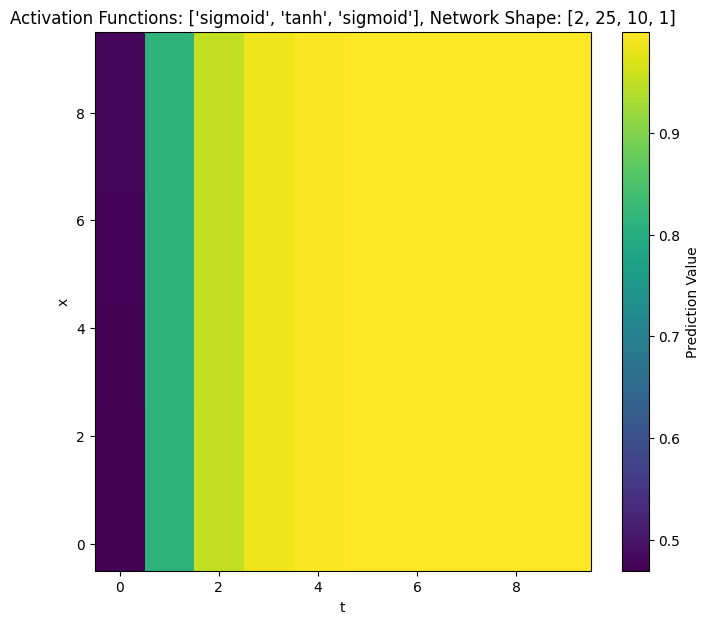

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


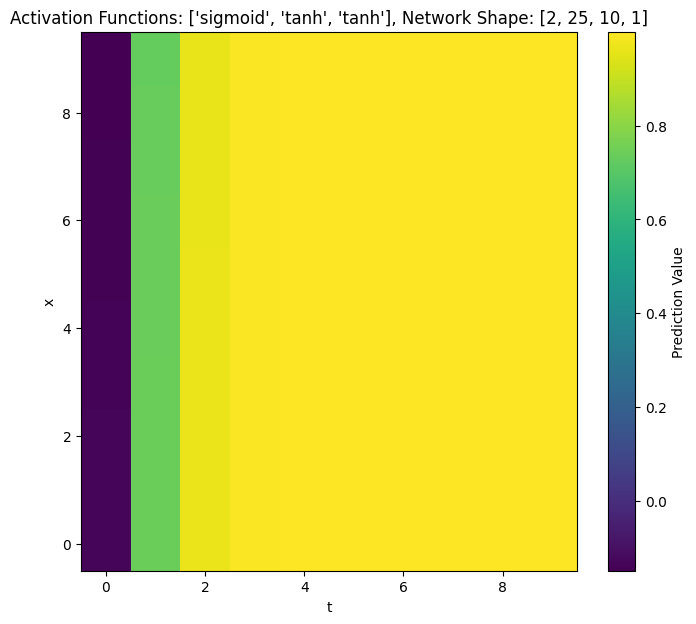

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.31s/it]


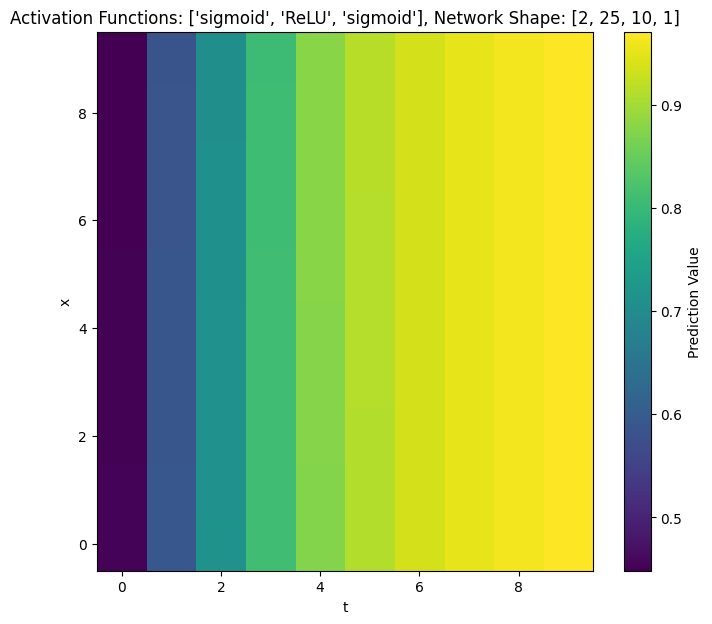

Training Network with [2, 25, 10, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.07s/it]


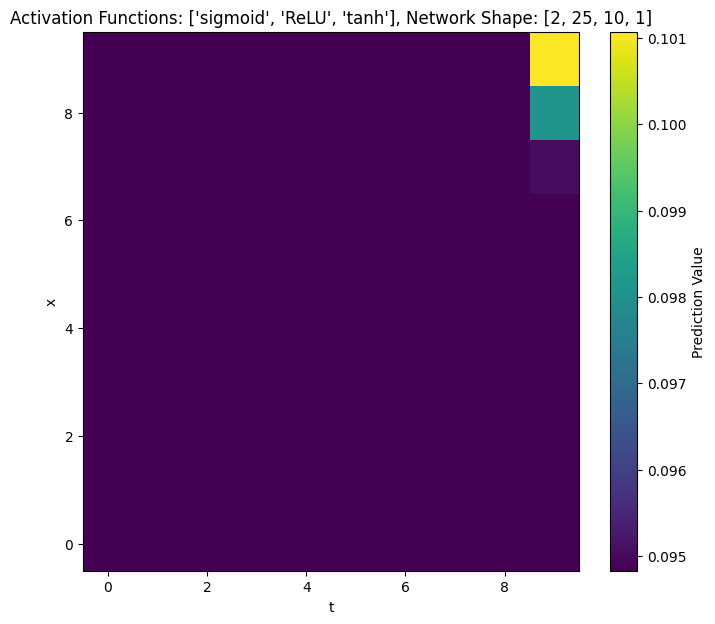

Training Network with [2, 25, 10, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


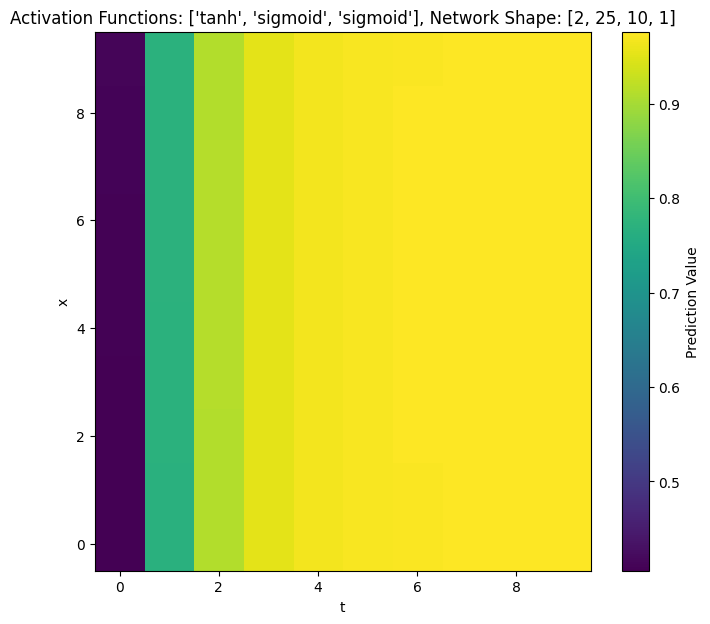

Training Network with [2, 25, 10, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.15s/it]


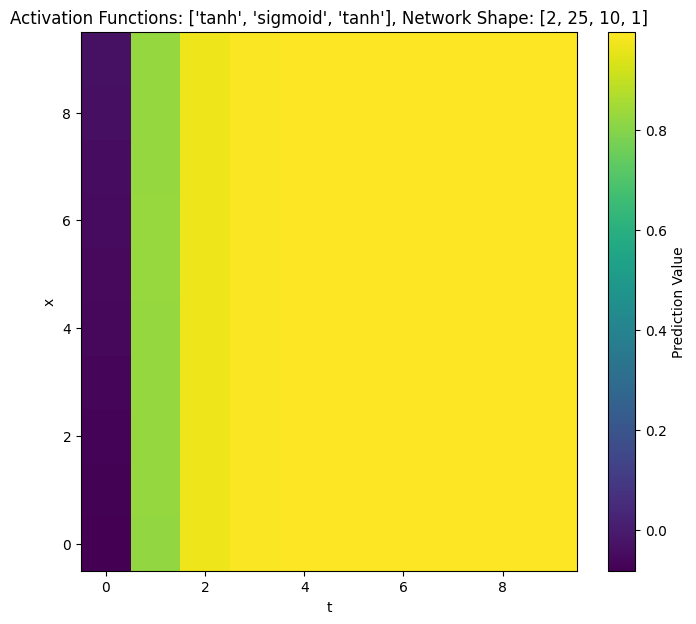

Training Network with [2, 25, 10, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:48<00:00,  1.22s/it]


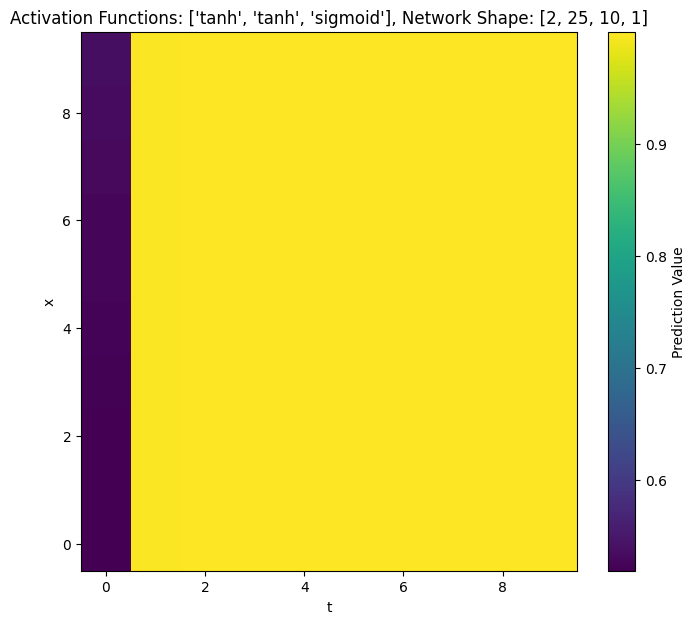

Training Network with [2, 25, 10, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:40<00:00,  1.00s/it]


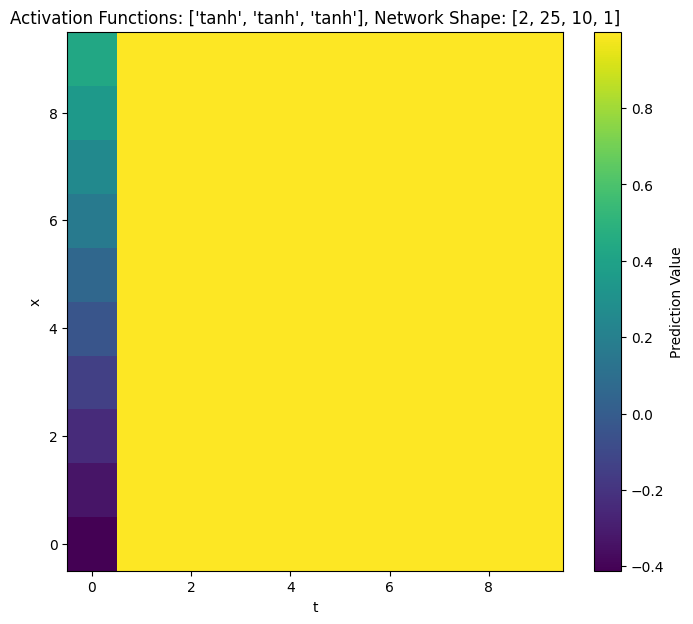

Training Network with [2, 25, 10, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


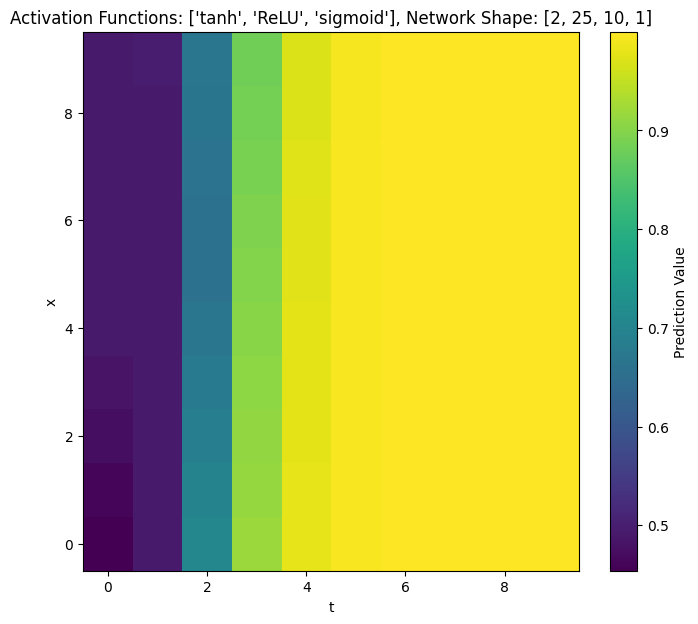

Training Network with [2, 25, 10, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


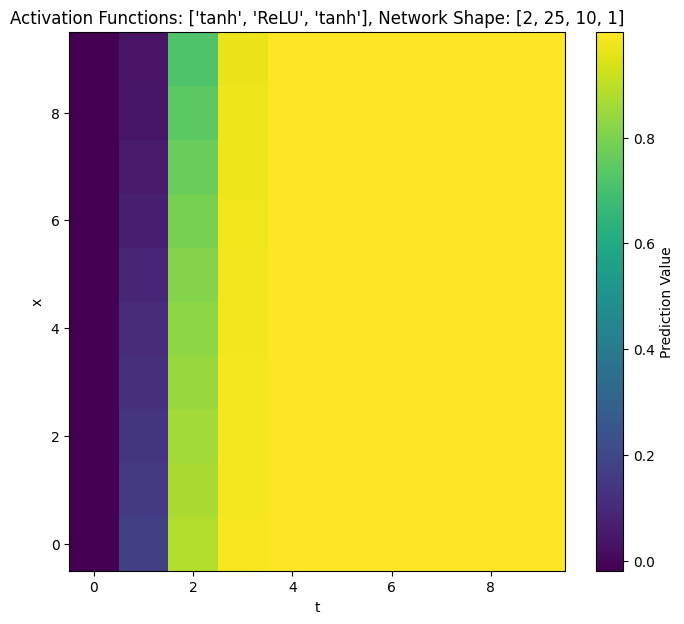

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


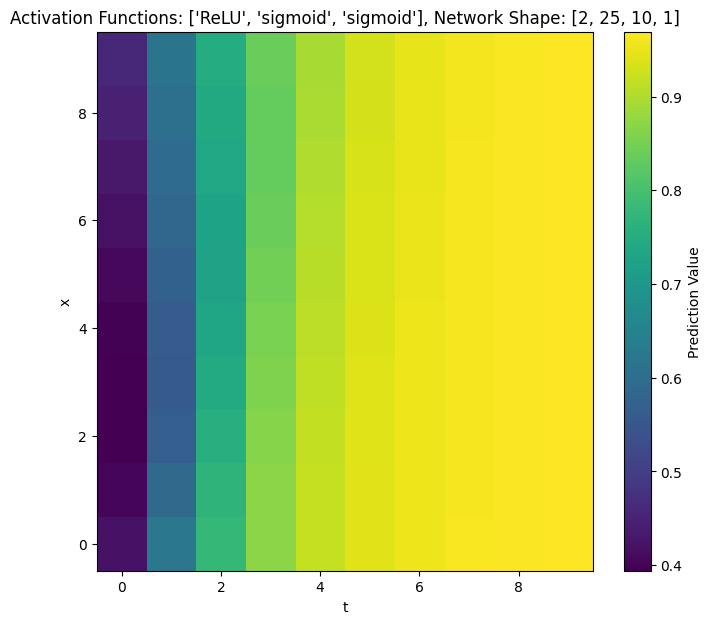

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:41<00:00,  1.05s/it]


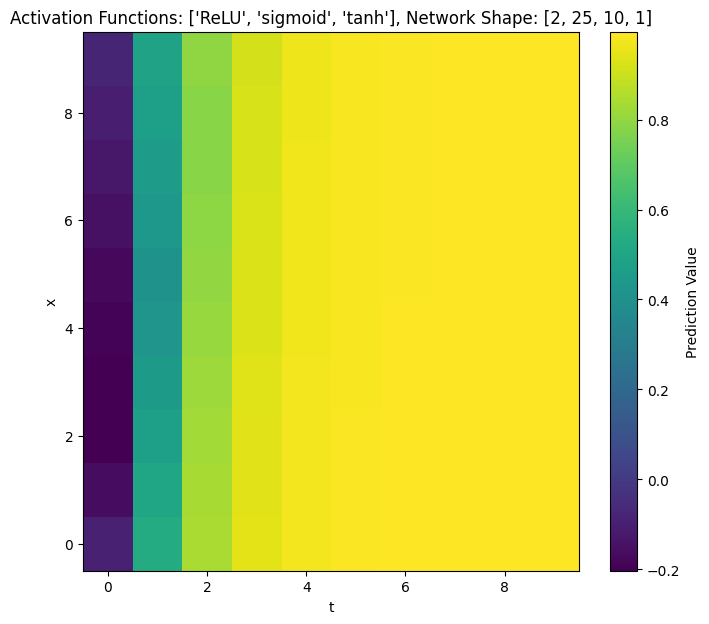

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


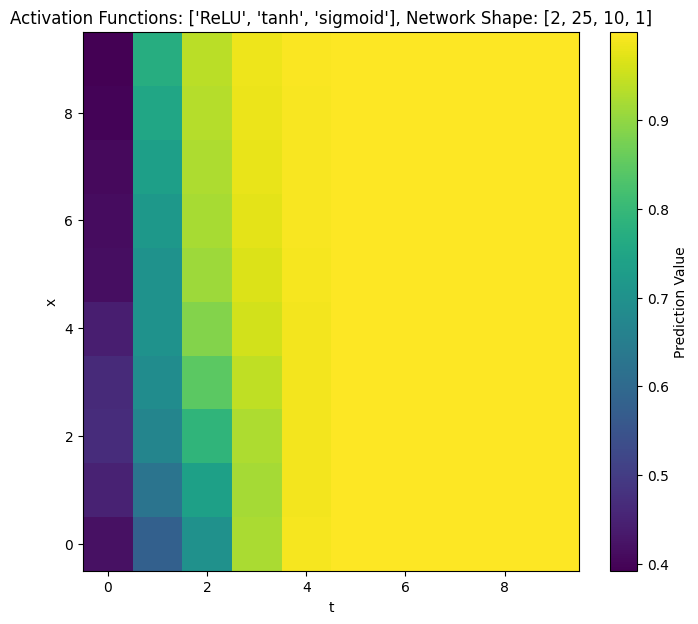

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


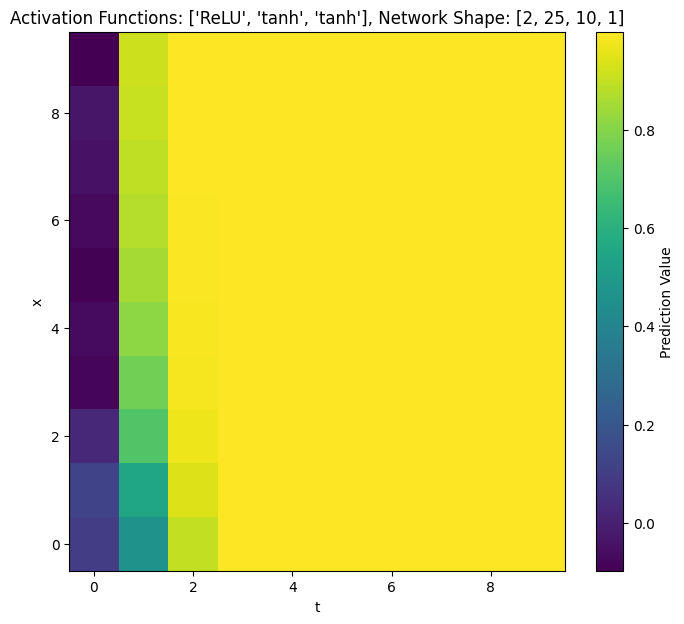

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


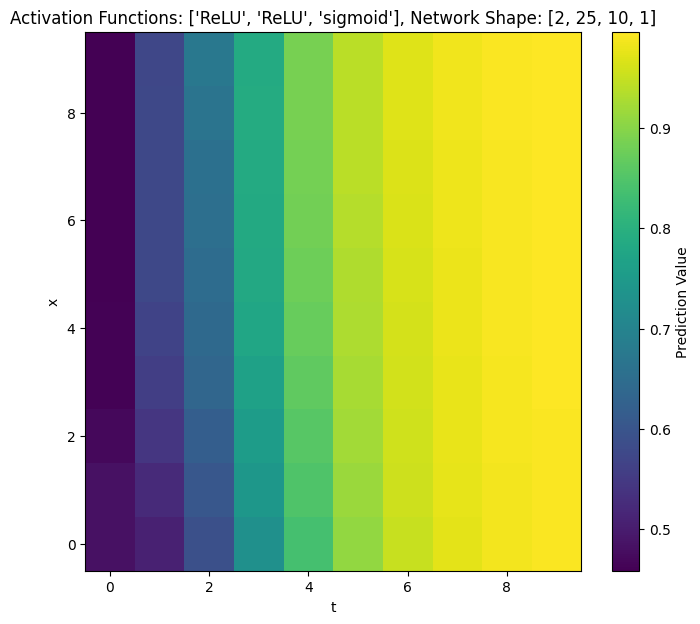

Training Network with [2, 25, 10, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


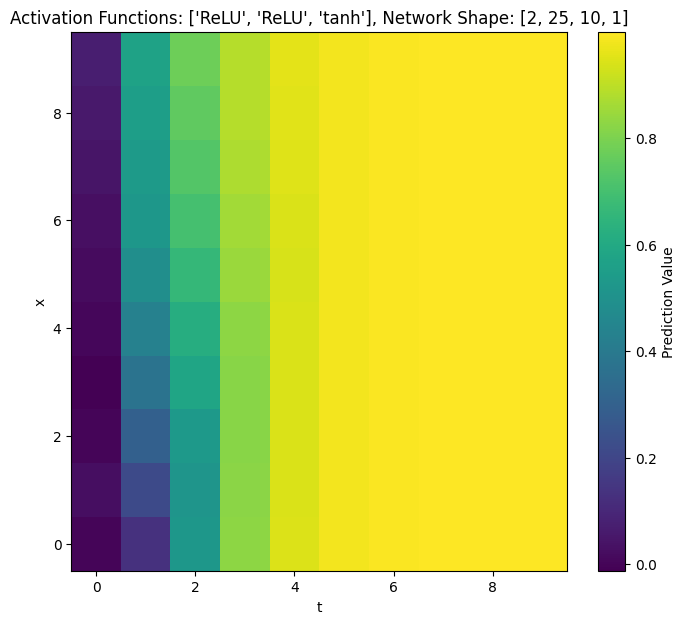

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:05<00:00,  1.65s/it]


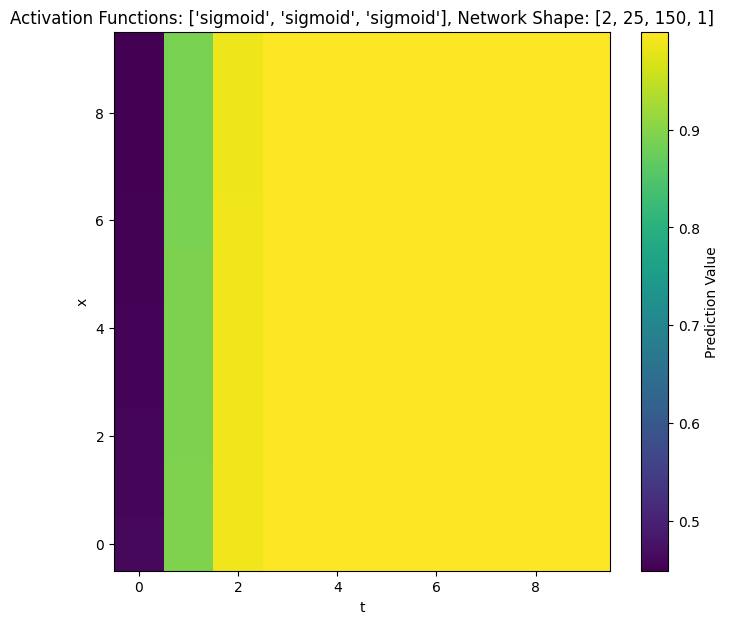

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.38s/it]


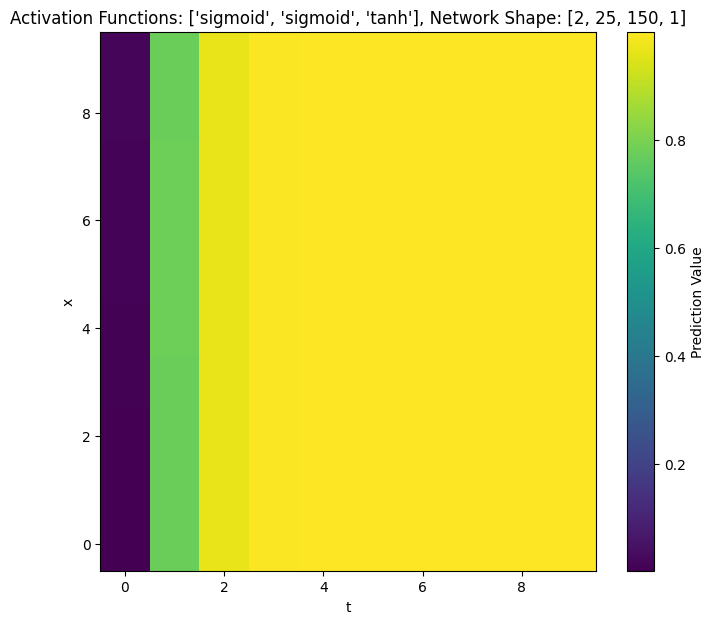

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:56<00:00,  1.42s/it]


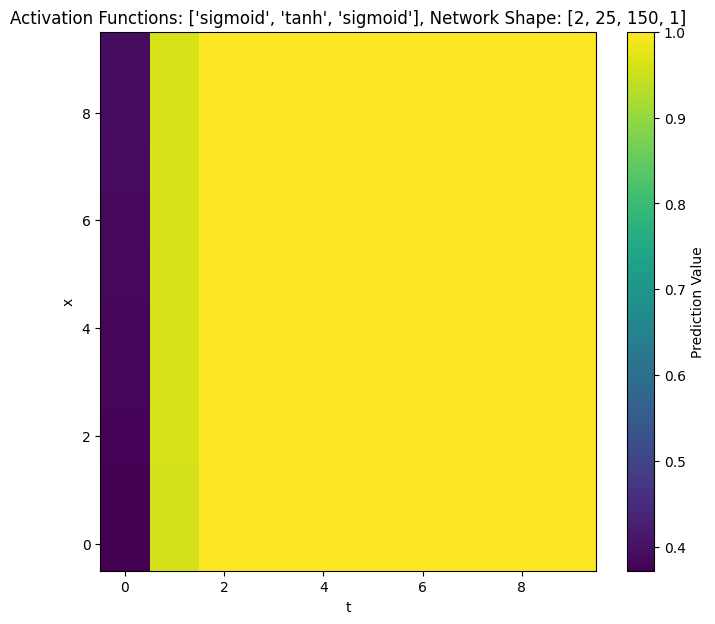

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.15s/it]


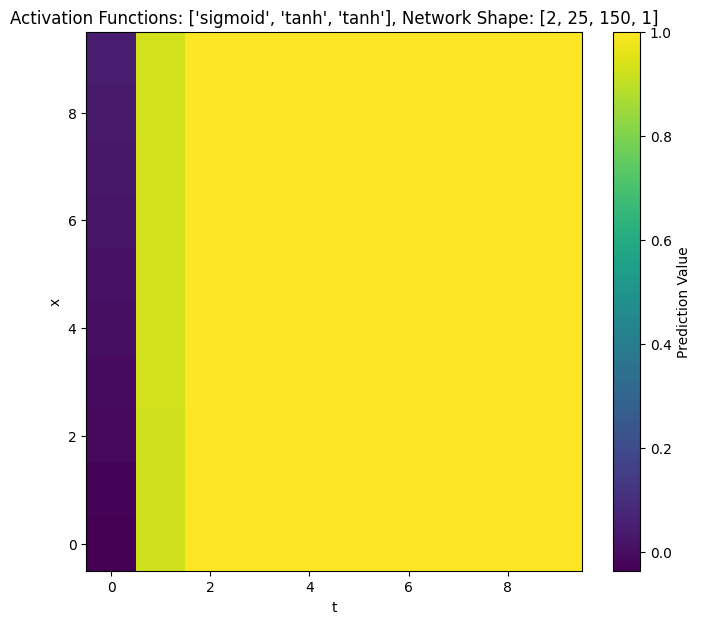

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.33s/it]


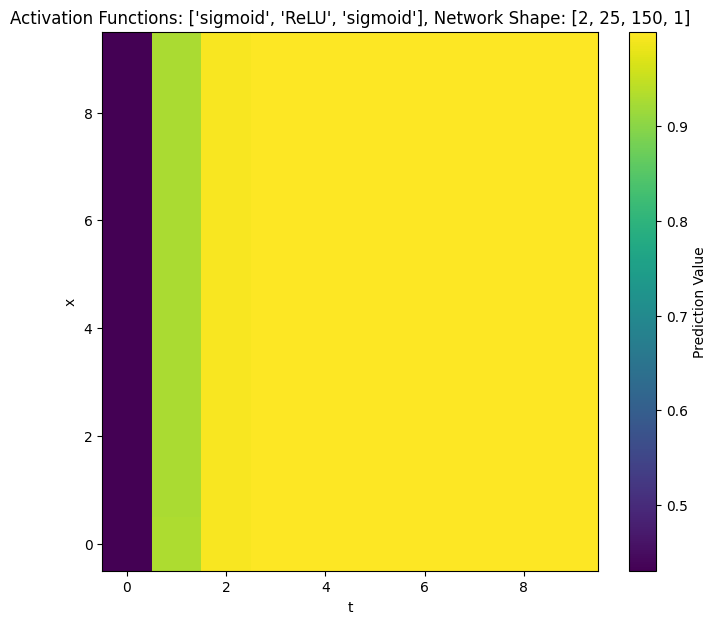

Training Network with [2, 25, 150, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


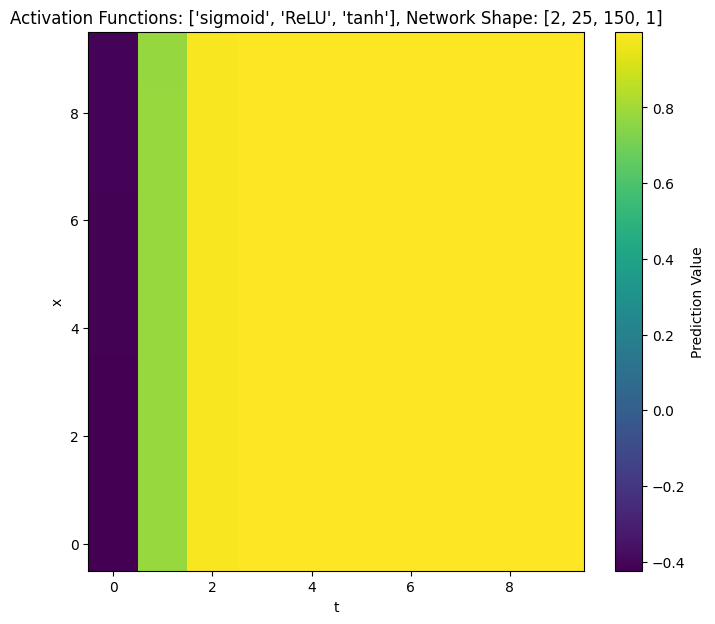

Training Network with [2, 25, 150, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:55<00:00,  1.40s/it]


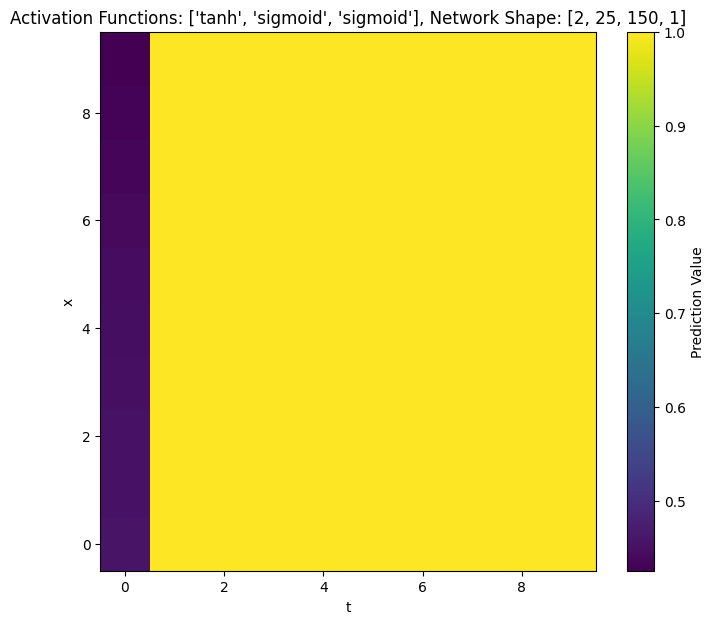

Training Network with [2, 25, 150, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


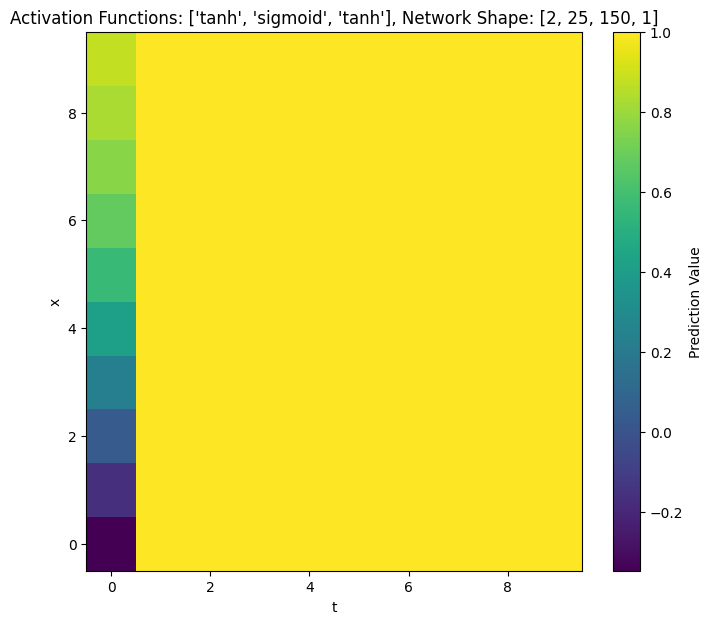

Training Network with [2, 25, 150, 1] layers and ['tanh', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:48<00:00,  1.20s/it]


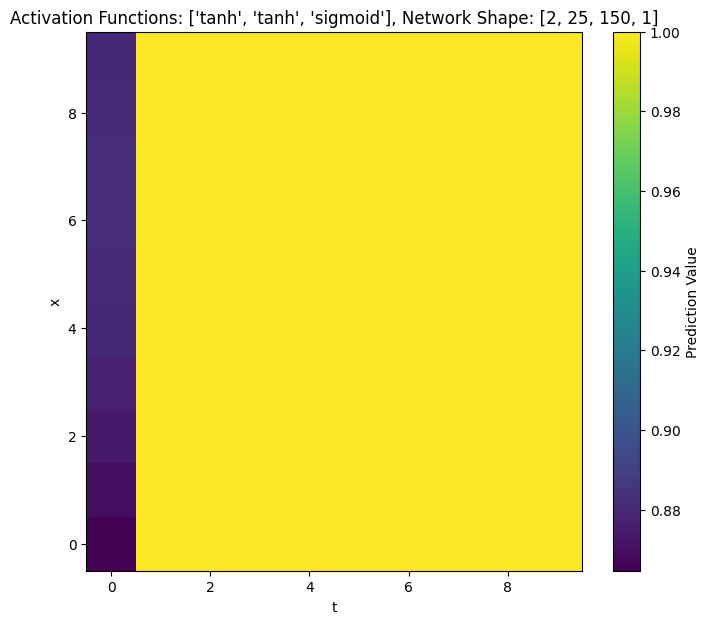

Training Network with [2, 25, 150, 1] layers and ['tanh', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:40<00:00,  1.00s/it]


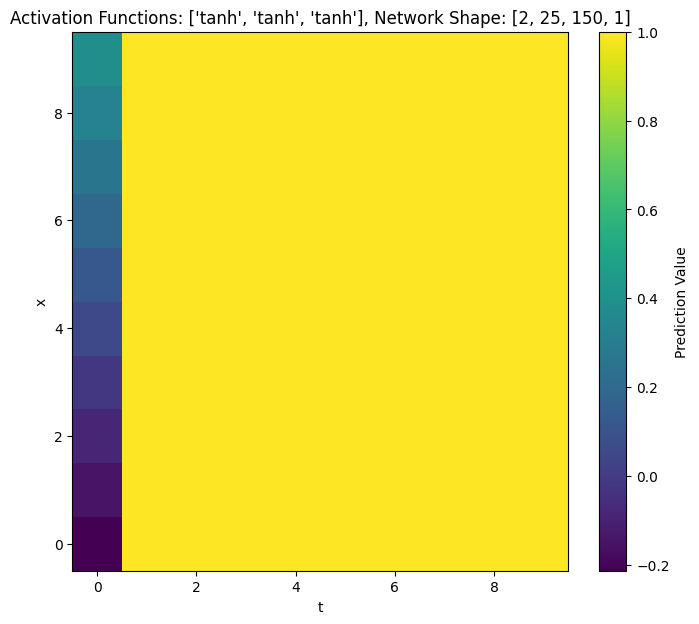

Training Network with [2, 25, 150, 1] layers and ['tanh', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:45<00:00,  1.13s/it]


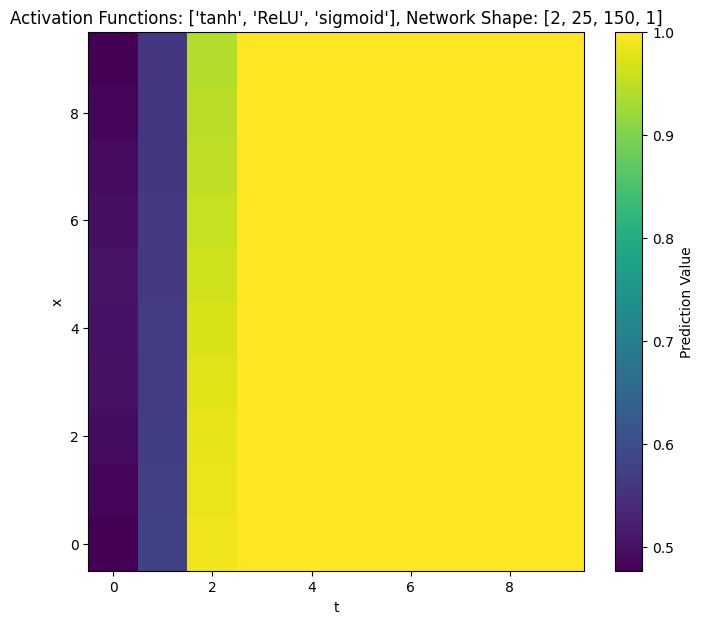

Training Network with [2, 25, 150, 1] layers and ['tanh', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


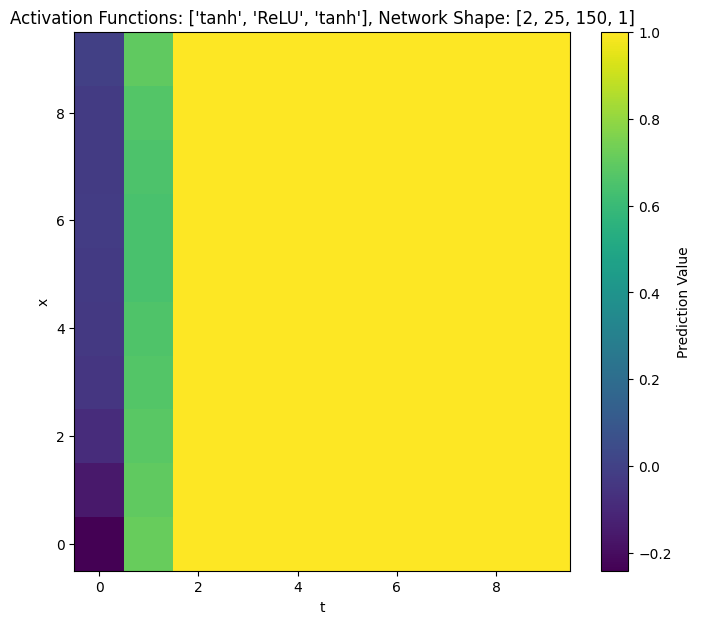

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.33s/it]


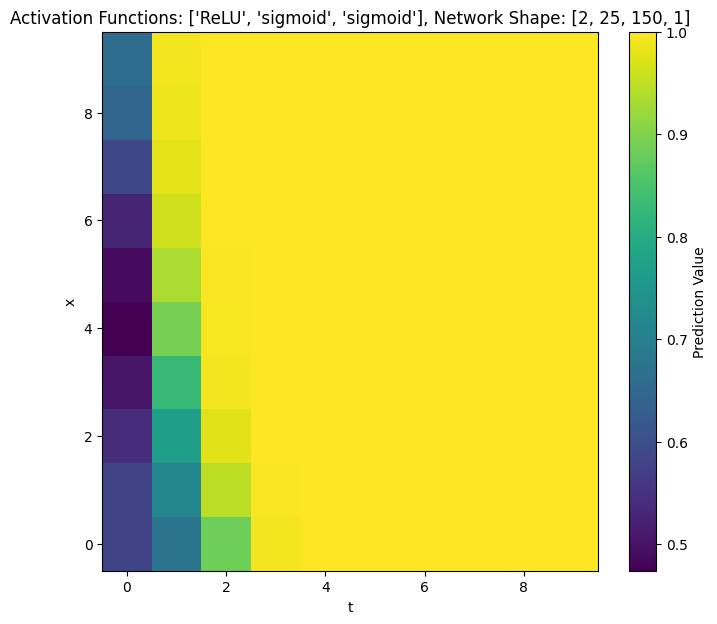

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:43<00:00,  1.08s/it]


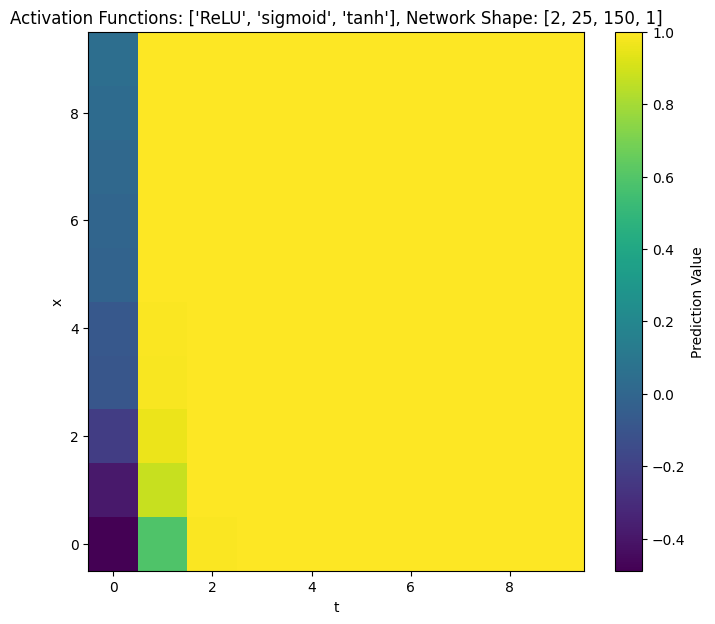

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


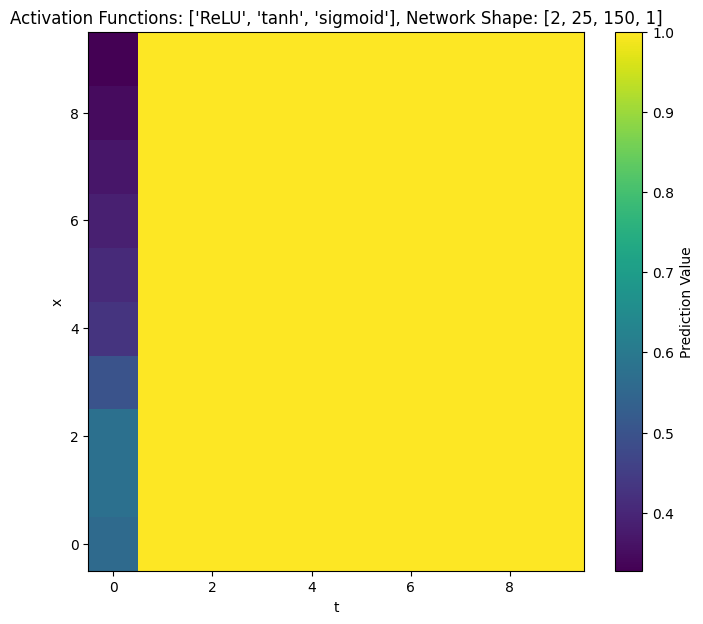

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


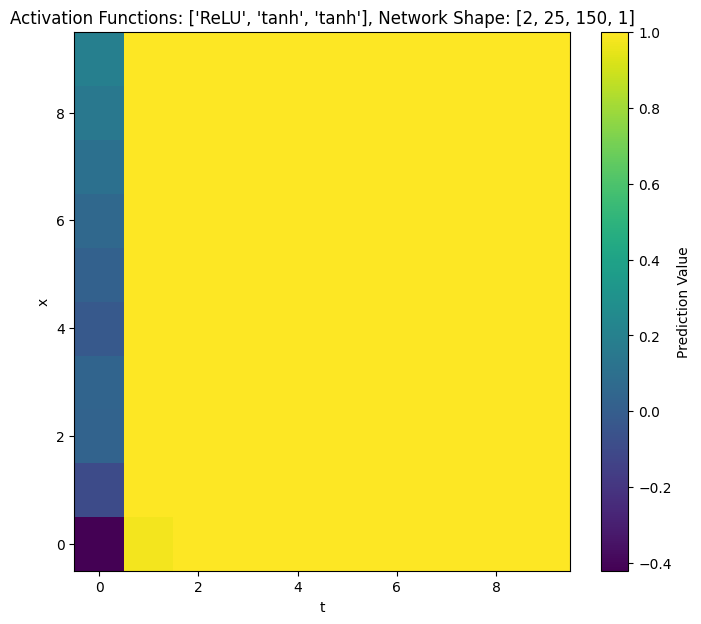

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


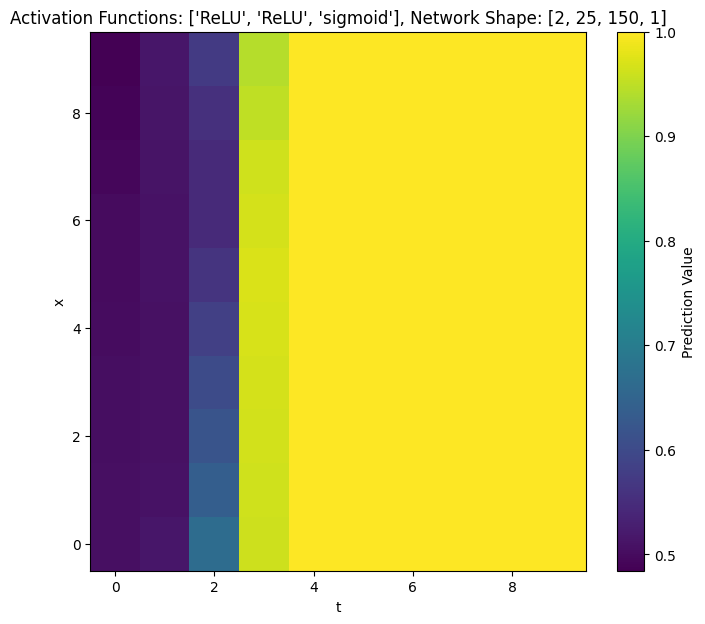

Training Network with [2, 25, 150, 1] layers and ['ReLU', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:33<00:00,  1.20it/s]


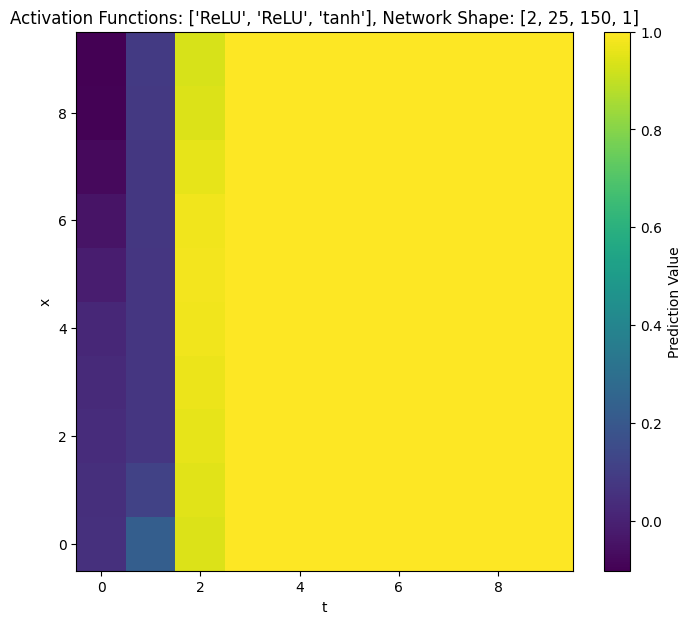

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'sigmoid', 'sigmoid'] activation functions


100%|██████████| 40/40 [01:06<00:00,  1.65s/it]


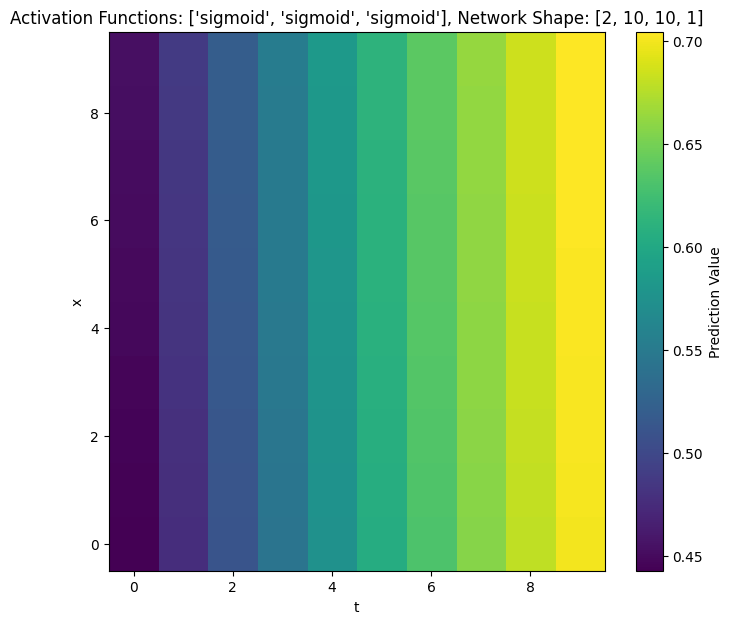

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'sigmoid', 'tanh'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.33s/it]


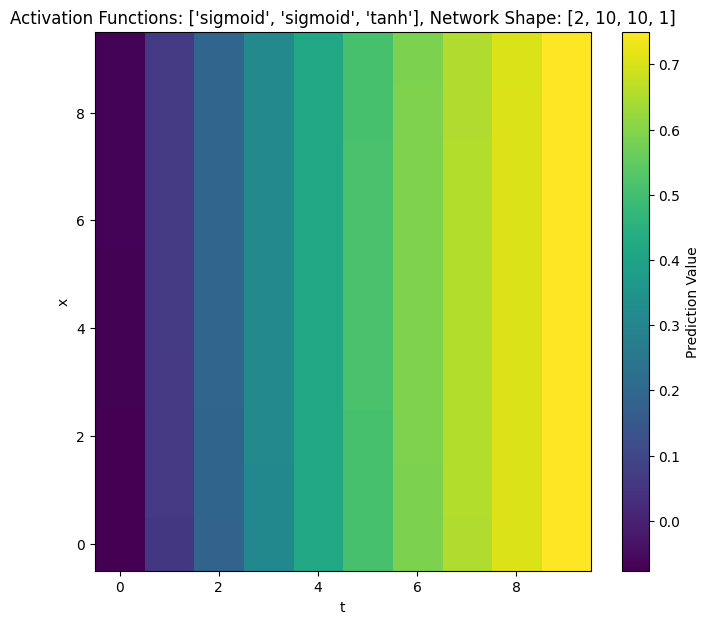

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'tanh', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:56<00:00,  1.42s/it]


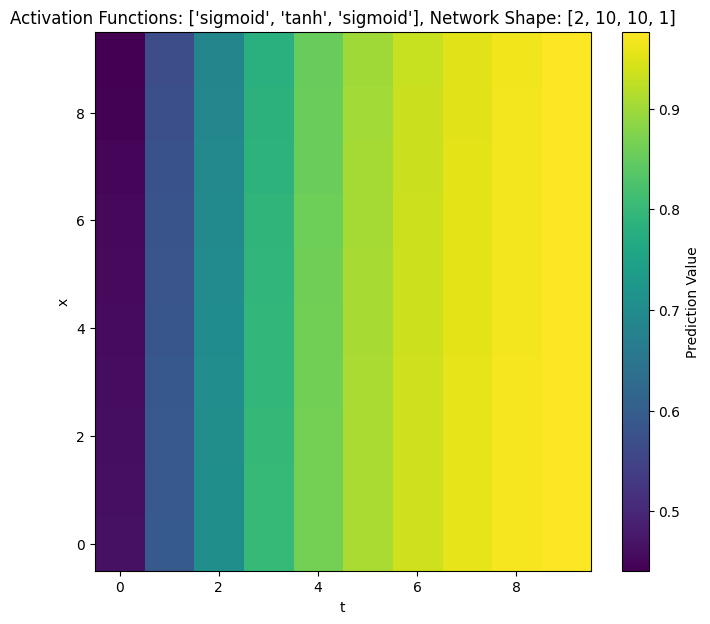

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'tanh', 'tanh'] activation functions


100%|██████████| 40/40 [00:46<00:00,  1.16s/it]


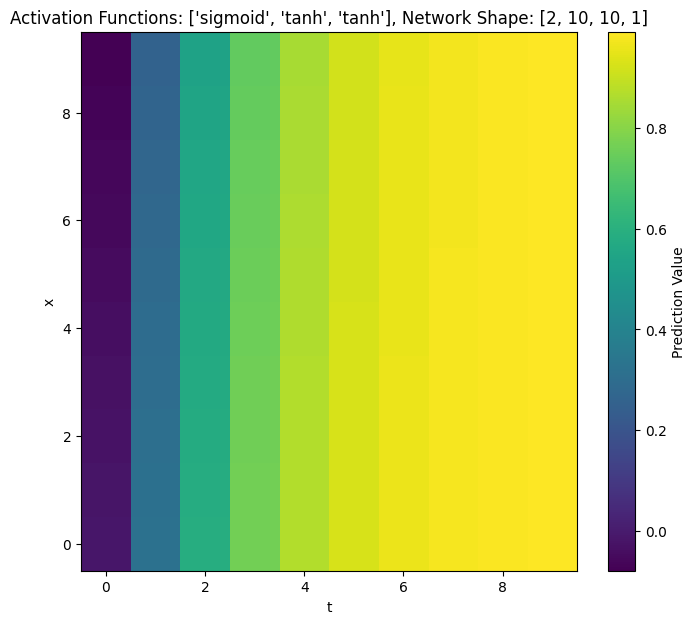

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'ReLU', 'sigmoid'] activation functions


100%|██████████| 40/40 [00:53<00:00,  1.34s/it]


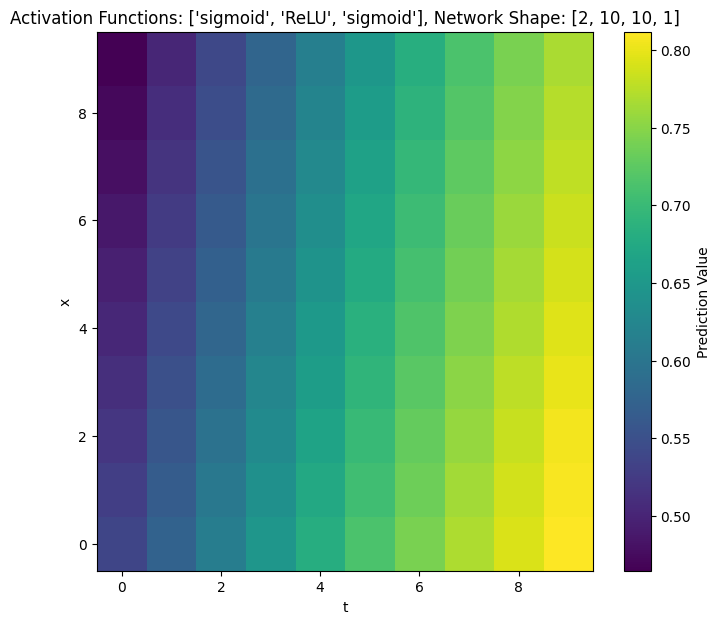

Training Network with [2, 10, 10, 1] layers and ['sigmoid', 'ReLU', 'tanh'] activation functions


100%|██████████| 40/40 [00:44<00:00,  1.12s/it]


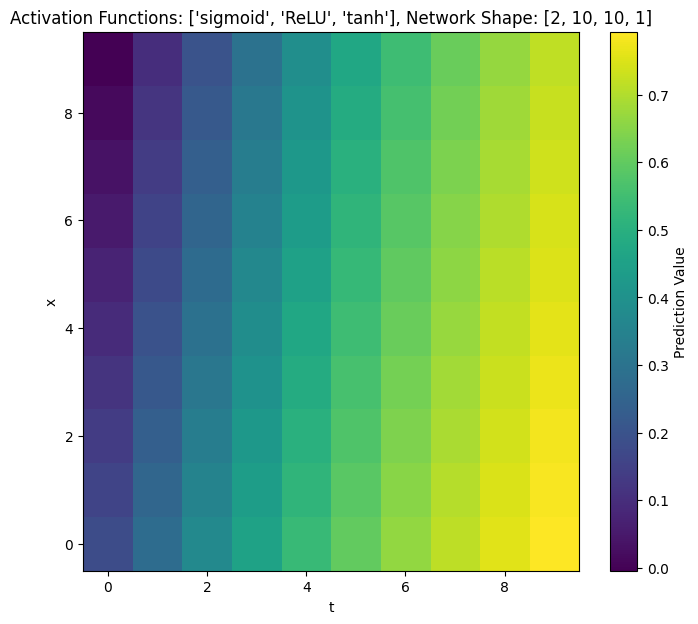

Training Network with [2, 10, 10, 1] layers and ['tanh', 'sigmoid', 'sigmoid'] activation functions


 92%|█████████▎| 37/40 [00:54<00:04,  1.49s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x103c1cbf0>>
Traceback (most recent call last):
  File "/Users/miamerlid/anaconda3/envs/fysstk/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
100%|██████████| 40/40 [00:59<00:00,  1.48s/it]


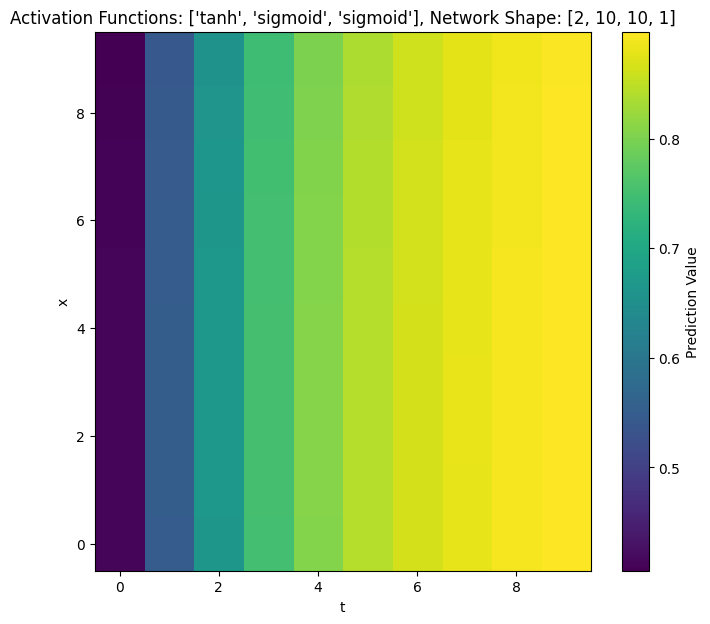

Training Network with [2, 10, 10, 1] layers and ['tanh', 'sigmoid', 'tanh'] activation functions


 22%|██▎       | 9/40 [00:11<00:41,  1.33s/it]


KeyboardInterrupt: 

In [3]:
    
hidden_layer_shapes = [10, 25, 10, 150]

hidden_layer_perms_ = []
for i in range(1, len(hidden_layer_shapes)+1):
    hidden_layer_perms_ += list(itertools.permutations(hidden_layer_shapes, i))

hidden_layers = []
for hidden_layer in hidden_layer_perms_:
    if len(hidden_layer) == 2:
        hidden_layers.append(list(hidden_layer))


initial_shape = 2
out_shape = 1
layers = []

for hidden_shape in hidden_layers:
    network_shape = [initial_shape] + hidden_shape + [out_shape]
    layers.append(network_shape)

combos_activations = []
activation_functions = ['sigmoid', 'tanh', 'ReLU']

for act1 in activation_functions:
    for act2 in activation_functions:
        for act3 in activation_functions[:-1]: # ReLU in output layer is bad
            combo = [act1, act2, act3]
            combos_activations.append(combo)

combos_activations = [combo for combo in combos_activations if len(combo) == 3]

optimizer = "Adam"
init = "Xavier"


print(f"Layers to test: {layers}")
print(f"Activation Functions to test: {combos_activations}")

losses = []
titles = []
for network_shape in layers:
    for activation_functions in combos_activations:
        print(f"Training Network with {network_shape} layers and {activation_functions} activation functions")


        model = NeuralNetwork(network_shape=network_shape, activation_funcs=activation_functions,  optimizer = optimizer, initialization=init)

        model.train_network(x = data.x, t = data.t, epochs=40, learning_rate=0.01)
        loss = model.loss
        losses.append(loss)
        title = f"Activation Functions: {activation_functions}, Network Shape: {network_shape}"
        titles.append(title)

        plt.figure(figsize=(8, 7))
        plt.imshow(model.final_preds, aspect='auto', cmap='viridis', origin='lower')
        plt.colorbar(label='Prediction Value')
        plt.title(f"Activation Functions: {activation_functions}, Network Shape: {network_shape}")
        plt.xlabel("t")
        plt.ylabel("x")
        plt.show()


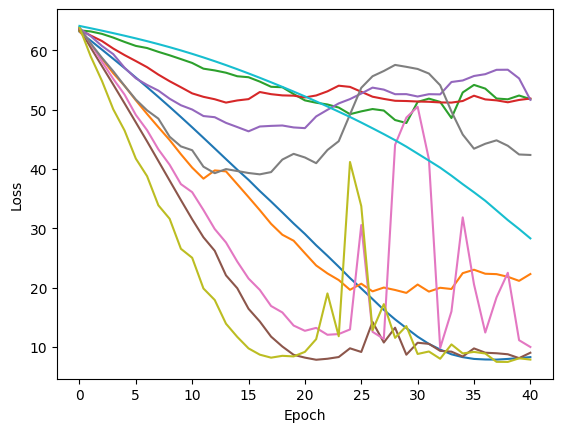

In [11]:

# find the ten best final losses
best_losses = sorted(losses)[:10]
best_indices = [losses.index(loss) for loss in best_losses]
best_titles = [titles[i] for i in best_indices]

for i in best_indices:
    plt.plot(losses[i], label=titles[i])
plt.xlabel("Epoch")
plt.ylabel("Loss")

#plt.legend()
plt.show()


Activation Functions: ['sigmoid', 'ReLU', 'sigmoid'], Network Shape: [2, 10, 150, 1]
['sigmoid', 'ReLU', 'sigmoid']
[2, 10, 150, 1]


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


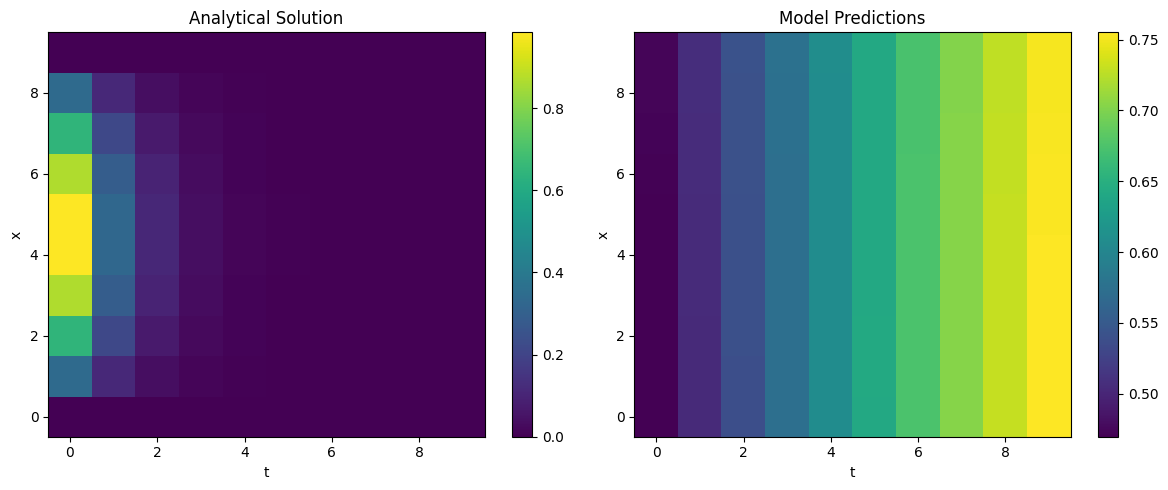

Mean Absolute Error: 0.5783180067094488
Max Absolute Error: 0.7551554458345426


In [16]:
def g_analytic(points):
    x = points[:, 0]
    t = points[:, 1]
    return np.exp(-np.pi**2*t)*np.sin(np.pi*x)


# Generate points for the analytical solution
point = np.array([[x_, t_] for x_ in data.x for t_ in data.t])
g_analytic_values = g_analytic(point).reshape(len(data.x), len(data.t))

# find the best model
best_model_index = np.argmin(losses[-1])
info = titles[best_model_index]
print(info)

activation_functions = re.search(r"Activation Functions: \[(.*?)\]", info)
activation_functions_list = (
    activation_functions.group(1).replace("'", "").split(", ") if activation_functions else None
)
print(activation_functions_list)

# Extract network shape
network_shape = re.search(r"Network Shape: \[(.*?)\]", info)
network_shape_list = list(map(int, network_shape.group(1).split(", "))) if network_shape else print("No Network Shape Found")
print(network_shape_list)


model = NeuralNetwork(network_shape=network_shape_list, activation_funcs=activation_functions_list,  optimizer = optimizer, initialization=init)
model.train_network(x = data.x, t = data.t, epochs=10, learning_rate=0.01)

difference = g_analytic_values - model.final_preds

# Plotting the analytical solution, model predictions, and their difference
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Analytical Solution Plot
im1 = axes[0].imshow(g_analytic_values, aspect='auto', cmap='viridis', origin='lower')
axes[0].set_title("Analytical Solution")
axes[0].set_xlabel("t")
axes[0].set_ylabel("x")
fig.colorbar(im1, ax=axes[0])

# Model Predictions Plot
im2 = axes[1].imshow(model.final_preds, aspect='auto', cmap='viridis', origin='lower')
axes[1].set_title("Model Predictions")
axes[1].set_xlabel("t")
axes[1].set_ylabel("x")
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print("Mean Absolute Error:", np.mean(np.abs(difference)))
print("Max Absolute Error:", np.max(np.abs(difference)))

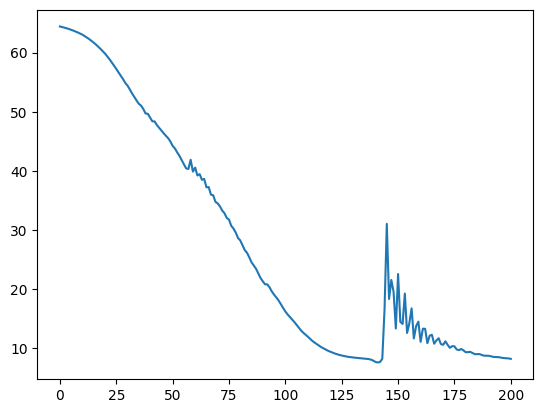

In [15]:
# plot loss 
plt.plot(model.loss)
